In [1]:
import imageio
import numpy as np
import PyNAFF as pnf
import scipy.io as sio 
import matplotlib.cm as cm
from math import log10, floor
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from scipy.optimize import curve_fit

In [2]:
plt.rcParams['figure.figsize'] = [4.0, 4.0]
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200

plt.rcParams['font.size'] = 10
plt.rcParams['legend.fontsize'] = 'medium'
plt.rcParams['lines.linewidth'] = 1

In [3]:
def cubic(x,a,m,c,b):
    return a*x**2 + x*m + c + b*x**3

In [4]:
def Md_fit(x, a, b, c, d):
        return a + b*np.cos(c*x+d)

In [5]:
def Md_ramp_fit(x, a, b, c, d):
    return a + b*(x-1)*np.cos(c*(x-1)+d)

In [6]:
def round_sig(x, sig=4):
    return round(x, sig-int(floor(log10(abs(x))))-1)

In [7]:
def add_input_file(dd, filename, label):
	f = filename
	p = dict()
	sio.loadmat(f, mdict=p)
	dd[label] = p
	print '\tAdded output data from ', filename, '\t dictionary key: ', label
	return dd

In [8]:
# Load a file
dd = dict()
maxi = 30
#turns = np.linspace(1, maxi, maxi)
turns = range(1,maxi)
print turns

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [9]:
for t in turns:
    if t <= 9:    inputs = 'bunch_output/mainbunch_00000' + str(int(t)) + '.mat'
    else:    inputs = 'bunch_output/mainbunch_0000' + str(int(t)) + '.mat'
    print inputs
    dd = add_input_file(dd, inputs, t)
    
    
dd = add_input_file(dd, 'bunch_output/mainbunch_-000001.mat', -1)

bunch_output/mainbunch_000001.mat
	Added output data from  bunch_output/mainbunch_000001.mat 	 dictionary key:  1
bunch_output/mainbunch_000002.mat
	Added output data from  bunch_output/mainbunch_000002.mat 	 dictionary key:  2
bunch_output/mainbunch_000003.mat
	Added output data from  bunch_output/mainbunch_000003.mat 	 dictionary key:  3
bunch_output/mainbunch_000004.mat
	Added output data from  bunch_output/mainbunch_000004.mat 	 dictionary key:  4
bunch_output/mainbunch_000005.mat
	Added output data from  bunch_output/mainbunch_000005.mat 	 dictionary key:  5
bunch_output/mainbunch_000006.mat
	Added output data from  bunch_output/mainbunch_000006.mat 	 dictionary key:  6
bunch_output/mainbunch_000007.mat
	Added output data from  bunch_output/mainbunch_000007.mat 	 dictionary key:  7
bunch_output/mainbunch_000008.mat
	Added output data from  bunch_output/mainbunch_000008.mat 	 dictionary key:  8
bunch_output/mainbunch_000009.mat
	Added output data from  bunch_output/mainbunch_000009

In [10]:
main_label = 'PS_Transfer_Test'
sc = 'noSC'
legend_label = 'Turn'

In [11]:
# access all particle x co-ordinates like this
dd[-1]['particles']['dE'][0][0][0]

array([-0.00391979, -0.0037238 , -0.00352781, -0.00333182, -0.00313583,
       -0.00293984, -0.00274385, -0.00254786, -0.00235188, -0.00215589,
       -0.0019599 , -0.00176391, -0.00156792, -0.00137193, -0.00117594,
       -0.00097995, -0.00078396, -0.00058797, -0.00039198, -0.00019599,
        0.        ,  0.00019599,  0.00039198,  0.00058797,  0.00078396,
        0.00097995,  0.00117594,  0.00137193,  0.00156792,  0.00176391,
        0.0019599 ,  0.00215589,  0.00235188,  0.00254786,  0.00274385,
        0.00293984,  0.00313583,  0.00333182,  0.00352781,  0.0037238 ,
        0.00391979])

In [12]:
dd[-1]['particles']['x'][0][0][0]

array([-0.00595169, -0.00568839, -0.00542509, -0.00516179, -0.00489849,
       -0.00463519, -0.00437189, -0.00410859, -0.00384529, -0.00358199,
       -0.00331869, -0.00305539, -0.00279209, -0.00252879, -0.00226549,
       -0.00200219, -0.00173889, -0.00147559, -0.00121229, -0.00094899,
       -0.00068569, -0.00042239, -0.00015909,  0.00010421,  0.00036751,
        0.00063081,  0.00089411,  0.00115741,  0.00142071,  0.00168401,
        0.00194731,  0.00221061,  0.00247391,  0.00273721,  0.00300051,
        0.00326381,  0.00352711,  0.00379041,  0.00405371,  0.00431701,
        0.00458031])

In [13]:
dd[-1]['particles']['xp'][0][0][0]

array([ 2.64938279e-04,  2.53898279e-04,  2.42858279e-04,  2.31818279e-04,
        2.20778279e-04,  2.09738279e-04,  1.98698279e-04,  1.87658279e-04,
        1.76618279e-04,  1.65578279e-04,  1.54538279e-04,  1.43498279e-04,
        1.32458279e-04,  1.21418279e-04,  1.10378279e-04,  9.93382791e-05,
        8.82982791e-05,  7.72582791e-05,  6.62182791e-05,  5.51782791e-05,
        4.41382791e-05,  3.30982791e-05,  2.20582791e-05,  1.10182791e-05,
       -2.17208602e-08, -1.10617209e-05, -2.21017209e-05, -3.31417209e-05,
       -4.41817209e-05, -5.52217209e-05, -6.62617209e-05, -7.73017209e-05,
       -8.83417209e-05, -9.93817209e-05, -1.10421721e-04, -1.21461721e-04,
       -1.32501721e-04, -1.43541721e-04, -1.54581721e-04, -1.65621721e-04,
       -1.76661721e-04])

2.63272744836 -0.110443441878


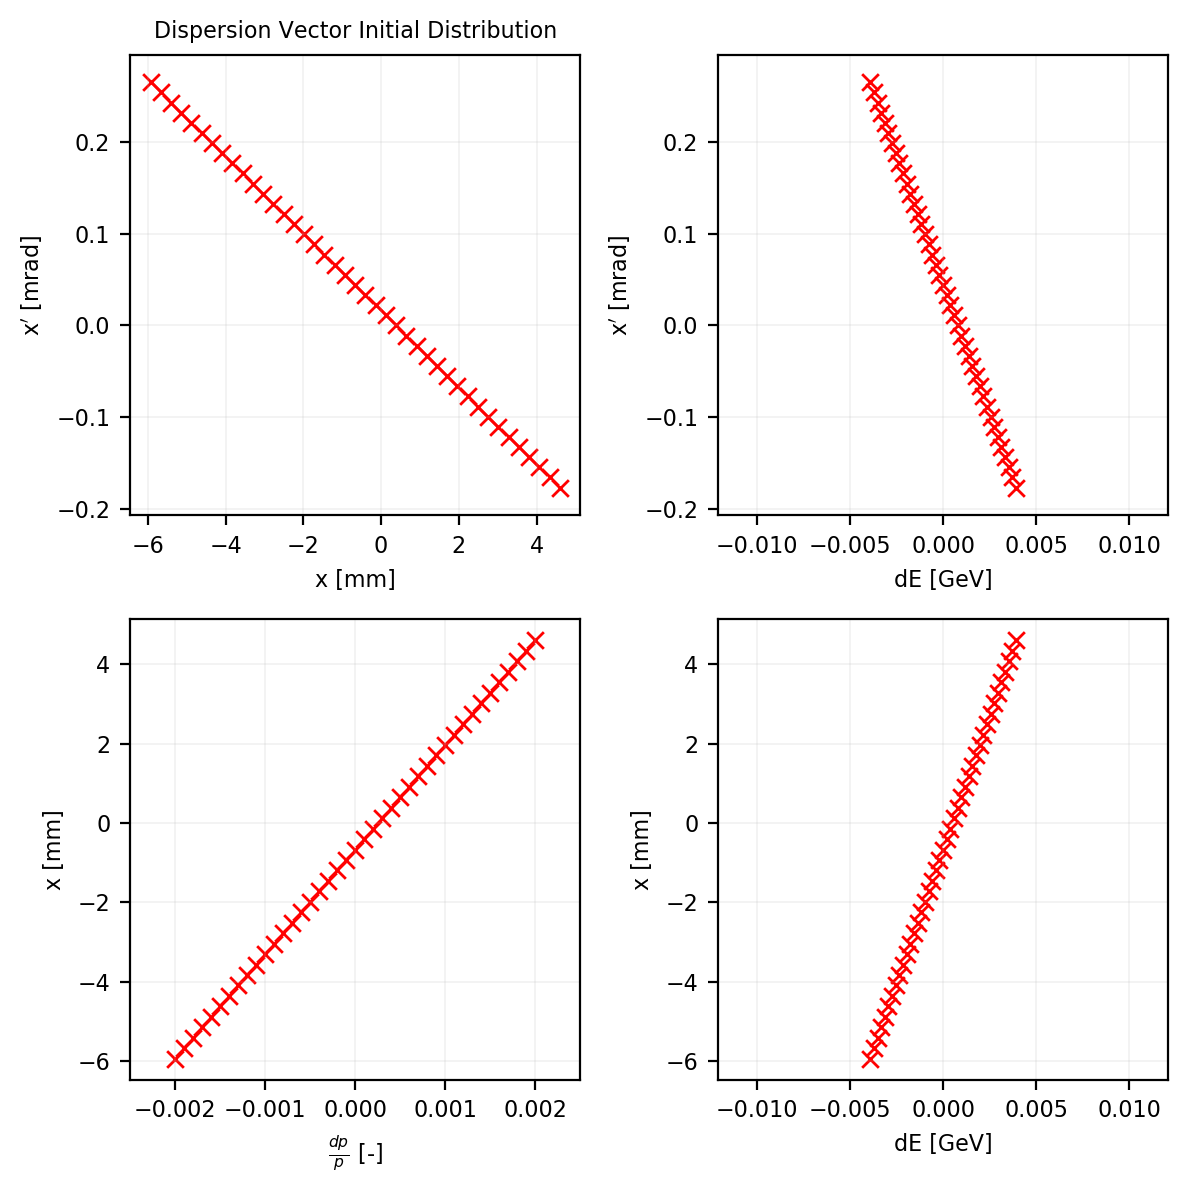

In [14]:
Beta = 0.915839281848
E = 2336654575.29 * 1E-9 

# From Matt
DX0 = 2.6327274483633305
DPX0 = -0.11044344187800001

#DX0 = 2.683
#DPX0 = -0.022

#DX0 = Md_fit(1, popt_OP_H[0], popt_OP_H[1], popt_OP_H[2], popt_OP_H[3])*0.9
#DPX0 = data_ptc_ref['DISP2']['PI.BSG52']*14
DELTAP = np.arange(-2.,2.1,0.1)*1e-3

closed_orbit_x = -0.000669
closed_orbit_xp = 0.000044

DE = (DELTAP) * Beta * Beta * E

X0 = DELTAP*DX0 + closed_orbit_x
PX0 = DELTAP*DPX0 + closed_orbit_xp
Z0 = np.zeros(np.shape(X0))
Y0 = np.zeros(np.shape(X0))
PY0 = np.zeros(np.shape(X0))

print DX0, DPX0
#print X0
#print PX0

plt.rcParams['figure.figsize'] = [6.0, 6.0]
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200

plt.rcParams['font.size'] = 8
plt.rcParams['legend.fontsize'] = 'medium'
plt.rcParams['lines.linewidth'] = 1

fig1, ax1 = plt.subplots(2,2)

ax1[0, 0].set_title('Dispersion Vector Initial Distribution', fontsize=8);

ax1[0, 0].scatter(X0*1E3, PX0*1E3, marker='x', color='r');
ax1[0, 0].grid(linewidth=0.1);
ax1[0, 0].set_xlabel('x [mm]');
ax1[0, 0].set_ylabel(r'x$^{\prime}$ [mrad]');

ax1[1, 1].scatter(DE, X0*1E3, marker='x', color='r');
ax1[1, 1].grid(linewidth=0.1);
ax1[1, 1].set_ylabel('x [mm]');
ax1[1, 1].set_xlabel('dE [GeV]');

ax1[0, 1].scatter(DE, PX0*1E3, marker='x', color='r');
ax1[0, 1].grid(linewidth=0.1);
ax1[0, 1].set_ylabel(r'x$^{\prime}$ [mrad]');
ax1[0, 1].set_xlabel('dE [GeV]');

ax1[1, 0].scatter(DELTAP, X0*1E3, marker='x', color='r');
ax1[1, 0].grid(linewidth=0.1);
ax1[1, 0].set_ylabel('x [mm]');
ax1[1, 0].set_xlabel(r'$\frac{dp}{p}$ [-]');
ax1[1, 0].set_xlim(-2.5E-3, 2.5E-3);

fig1.tight_layout();

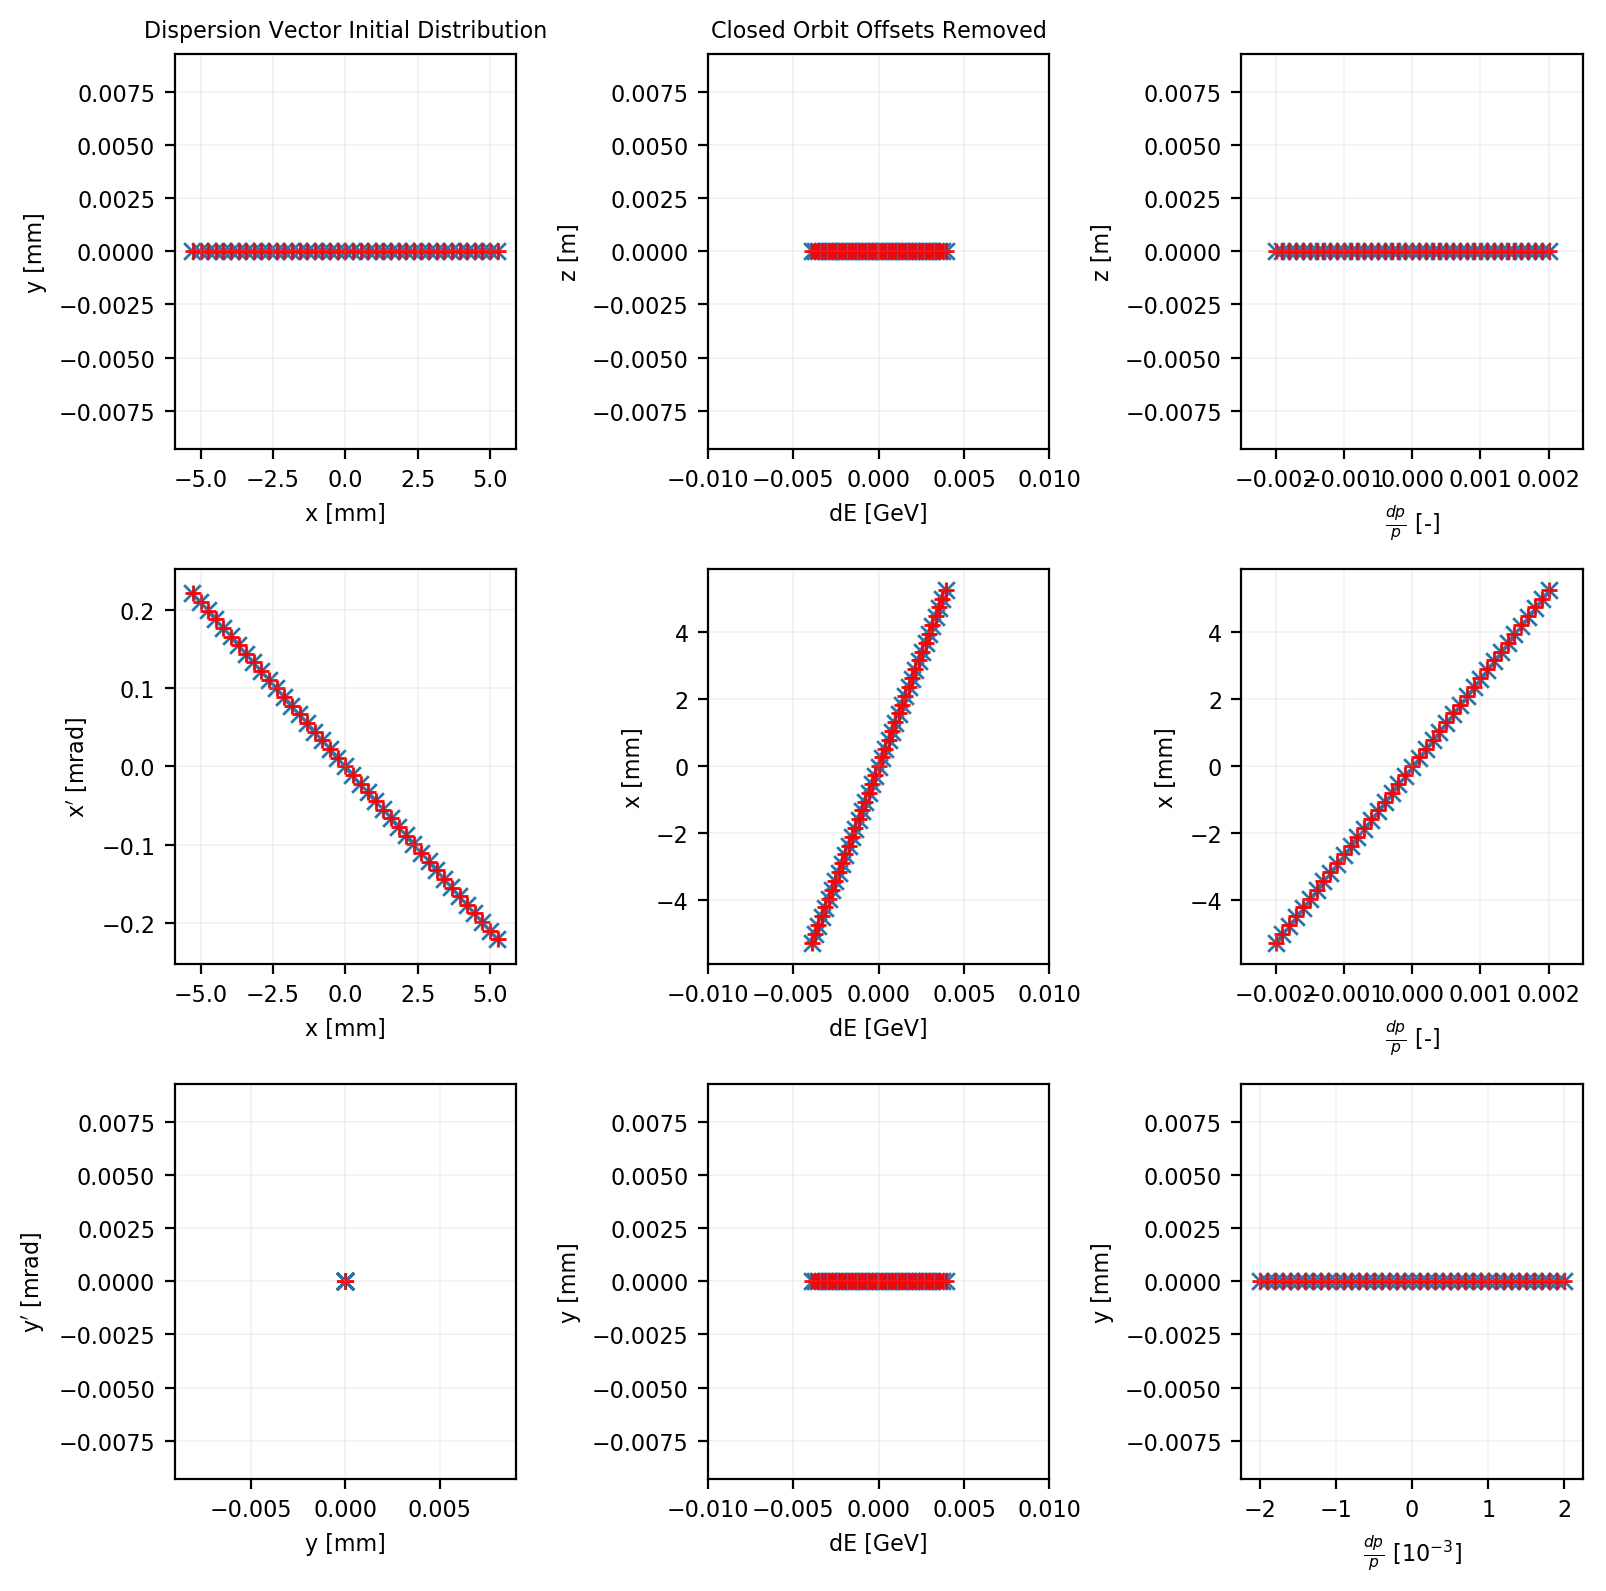

In [15]:
plt.rcParams['figure.figsize'] = [8.0, 8.0]
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200

plt.rcParams['font.size'] = 8
plt.rcParams['legend.fontsize'] = 'medium'
plt.rcParams['lines.linewidth'] = 1

closed_orbit_x = -0.000669
closed_orbit_xp = 0.000044

Beta = 0.915839281848
E = 2336654575.29 * 1E-9 

fig1, ax1 = plt.subplots(3, 3)

ax1[0, 0].set_title('Dispersion Vector Initial Distribution', fontsize=8);
ax1[0, 1].set_title('Closed Orbit Offsets Removed', fontsize=8);

ax1[0, 0].scatter((dd[-1]['particles']['x'][0][0][0]-closed_orbit_x)*1E3, dd[-1]['particles']['y'][0][0][0]*1E3, marker='x');
ax1[0, 0].scatter((X0-closed_orbit_x)*1E3, Y0*1E3, marker='+', color='r');
ax1[0, 0].grid(linewidth=0.1);
ax1[0, 0].set_xlabel('x [mm]');
ax1[0, 0].set_ylabel('y [mm]');

ax1[0, 1].scatter(dd[-1]['particles']['dE'][0][0][0], dd[-1]['particles']['z'][0][0][0], marker='x');
ax1[0, 1].scatter(DE, Z0, marker='+', color='r');
ax1[0, 1].grid(linewidth=0.1);
ax1[0, 1].set_ylabel('z [m]');
ax1[0, 1].set_xlabel('dE [GeV]');
ax1[0, 1].set_xlim(-1E-2, 1E-2);

ax1[0, 2].scatter( ((dd[-1]['particles']['dE'][0][0][0])/E/Beta**2) , dd[-1]['particles']['z'][0][0][0], marker='x');
ax1[0, 2].scatter(DELTAP, Z0, marker='+', color='r');
ax1[0, 2].grid(linewidth=0.1);
ax1[0, 2].set_ylabel('z [m]');
ax1[0, 2].set_xlabel(r'$\frac{dp}{p}$ [-]');
ax1[0, 2].set_xlim(-2.5E-3, 2.5E-3);

ax1[1, 0].scatter((dd[-1]['particles']['x'][0][0][0]-closed_orbit_x)*1E3, (dd[-1]['particles']['xp'][0][0][0]-closed_orbit_xp)*1E3, marker='x');
ax1[1, 0].scatter((X0-closed_orbit_x)*1E3, (PX0-closed_orbit_xp)*1E3, marker='+', color='r');
ax1[1, 0].grid(linewidth=0.1);
ax1[1, 0].set_xlabel('x [mm]');
ax1[1, 0].set_ylabel(r'x$^{\prime}$ [mrad]');

ax1[1, 1].scatter(dd[-1]['particles']['dE'][0][0][0], (dd[-1]['particles']['x'][0][0][0]-closed_orbit_x)*1E3, marker='x');
ax1[1, 1].scatter(DE, (X0-closed_orbit_x)*1E3, marker='+', color='r');
ax1[1, 1].grid(linewidth=0.1);
ax1[1, 1].set_xlabel('dE [GeV]');
ax1[1, 1].set_ylabel('x [mm]');
ax1[1, 1].set_xlim(-1E-2, 1E-2);

ax1[1, 2].scatter(((dd[-1]['particles']['dE'][0][0][0])/E/Beta**2), (dd[-1]['particles']['x'][0][0][0]-closed_orbit_x)*1E3, marker='x');
ax1[1, 2].scatter(DELTAP, (X0-closed_orbit_x)*1E3, marker='+', color='r');
ax1[1, 2].grid(linewidth=0.1);
ax1[1, 2].set_xlabel(r'$\frac{dp}{p}$ [-]');
ax1[1, 2].set_ylabel('x [mm]');
ax1[1, 2].set_xlim(-2.5E-3, 2.5E-3);

ax1[2, 0].scatter(dd[-1]['particles']['y'][0][0][0]*1E3, dd[-1]['particles']['yp'][0][0][0]*1E3, marker='x');
ax1[2, 0].scatter(Y0*1E3, PY0*1E3, marker='+', color='r');
ax1[2, 0].grid(linewidth=0.1);
ax1[2, 0].set_xlabel('y [mm]');
ax1[2, 0].set_ylabel(r'y$^{\prime}$ [mrad]');

ax1[2, 1].scatter(dd[-1]['particles']['dE'][0][0][0], dd[-1]['particles']['y'][0][0][0]*1E3, marker='x');
ax1[2, 1].scatter(DE, Y0*1E3, marker='+', color='r');
ax1[2, 1].grid(linewidth=0.1);
ax1[2, 1].set_xlabel('dE [GeV]');
ax1[2, 1].set_ylabel('y [mm]');
ax1[2, 1].set_xlim(-1E-2, 1E-2);

ax1[2, 2].scatter(((dd[-1]['particles']['dE'][0][0][0])/E/Beta**2)*1E3, dd[-1]['particles']['y'][0][0][0]*1E3, marker='x');
ax1[2, 2].scatter(DELTAP*1E3, Y0*1E3, marker='+', color='r');
ax1[2, 2].grid(linewidth=0.1);
ax1[2, 2].set_xlabel(r'$\frac{dp}{p}$ [10$^{-3}$]');
ax1[2, 2].set_ylabel('y [mm]');
#ax1[2, 2].set_xlim(-2.5E-3, 2.5E-3);

fig1.tight_layout();

savename = 'Dispersion_Vector_Initial_Distribution.png'
fig1.savefig(savename, dpi = 100)
#plt.close()

In [16]:
closed_orbit_x = -0.000669
closed_orbit_xp = 0.000044

x_t = (np.array(dd[-1]['particles']['x'][0][0][0]) - closed_orbit_x)

m_x_t = np.array(X0 - closed_orbit_x)

print x_t
print m_x_t

print x_t - m_x_t

[-5.28268501e-03 -5.01938501e-03 -4.75608501e-03 -4.49278501e-03
 -4.22948501e-03 -3.96618501e-03 -3.70288501e-03 -3.43958501e-03
 -3.17628501e-03 -2.91298501e-03 -2.64968501e-03 -2.38638501e-03
 -2.12308501e-03 -1.85978501e-03 -1.59648501e-03 -1.33318501e-03
 -1.06988501e-03 -8.06585009e-04 -5.43285009e-04 -2.79985009e-04
 -1.66850085e-05  2.46614991e-04  5.09914991e-04  7.73214991e-04
  1.03651499e-03  1.29981499e-03  1.56311499e-03  1.82641499e-03
  2.08971499e-03  2.35301499e-03  2.61631499e-03  2.87961499e-03
  3.14291499e-03  3.40621499e-03  3.66951499e-03  3.93281499e-03
  4.19611499e-03  4.45941499e-03  4.72271499e-03  4.98601499e-03
  5.24931499e-03]
[-5.26545490e-03 -5.00218215e-03 -4.73890941e-03 -4.47563666e-03
 -4.21236392e-03 -3.94909117e-03 -3.68581843e-03 -3.42254568e-03
 -3.15927294e-03 -2.89600019e-03 -2.63272745e-03 -2.36945470e-03
 -2.10618196e-03 -1.84290921e-03 -1.57963647e-03 -1.31636372e-03
 -1.05309098e-03 -7.89818235e-04 -5.26545490e-04 -2.63272745e-04
  4.662

In [17]:
bw_gifnames_x_xp = []
hm_gifnames_x_xp = []
bw_gifnames_y_yp = []
hm_gifnames_y_yp = []

In [18]:
np.arange(-2, 2.1, 0.1)*1e-3

array([-2.00000000e-03, -1.90000000e-03, -1.80000000e-03, -1.70000000e-03,
       -1.60000000e-03, -1.50000000e-03, -1.40000000e-03, -1.30000000e-03,
       -1.20000000e-03, -1.10000000e-03, -1.00000000e-03, -9.00000000e-04,
       -8.00000000e-04, -7.00000000e-04, -6.00000000e-04, -5.00000000e-04,
       -4.00000000e-04, -3.00000000e-04, -2.00000000e-04, -1.00000000e-04,
        1.77635684e-18,  1.00000000e-04,  2.00000000e-04,  3.00000000e-04,
        4.00000000e-04,  5.00000000e-04,  6.00000000e-04,  7.00000000e-04,
        8.00000000e-04,  9.00000000e-04,  1.00000000e-03,  1.10000000e-03,
        1.20000000e-03,  1.30000000e-03,  1.40000000e-03,  1.50000000e-03,
        1.60000000e-03,  1.70000000e-03,  1.80000000e-03,  1.90000000e-03,
        2.00000000e-03])

/usr/lib64/python2.7/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


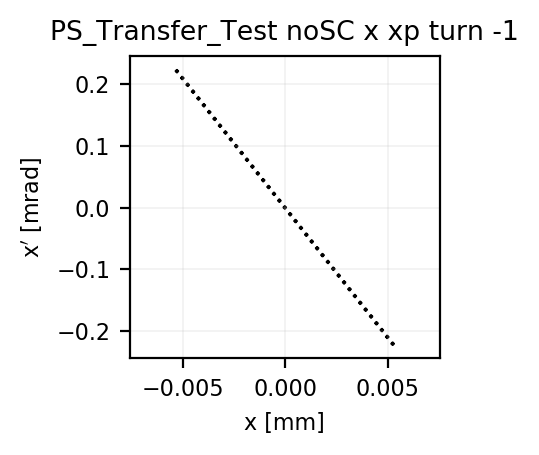

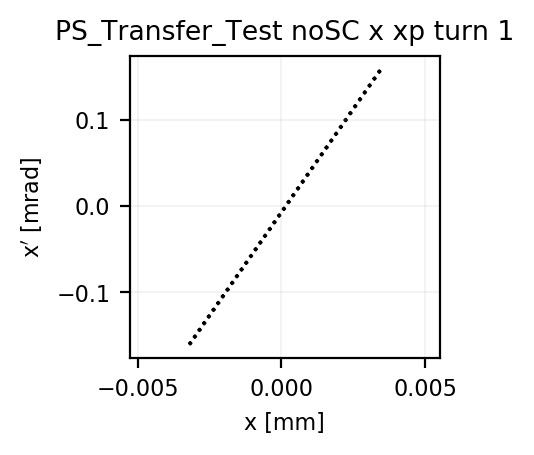

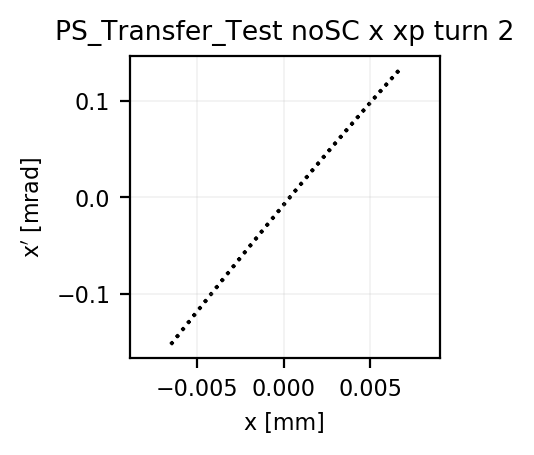

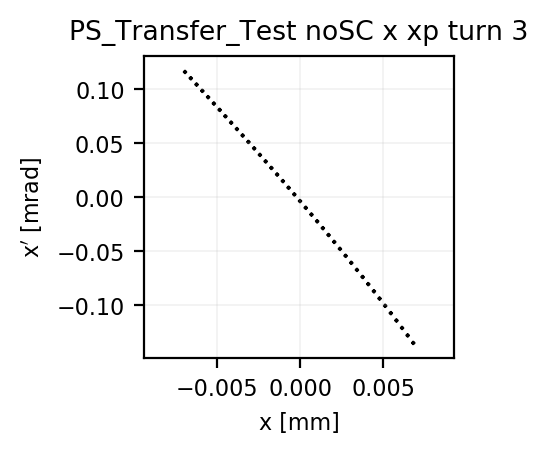

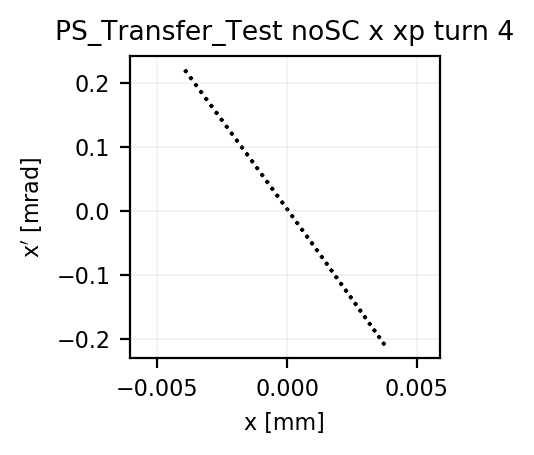

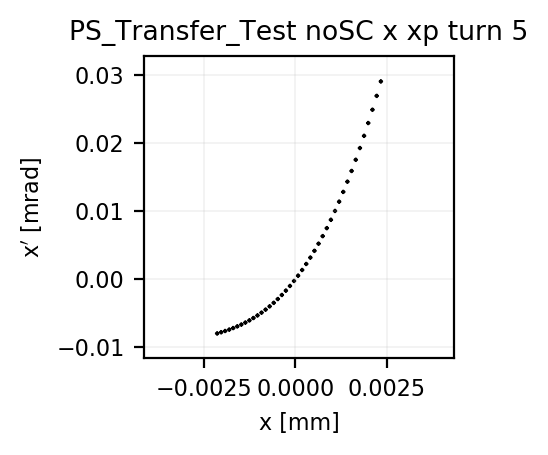

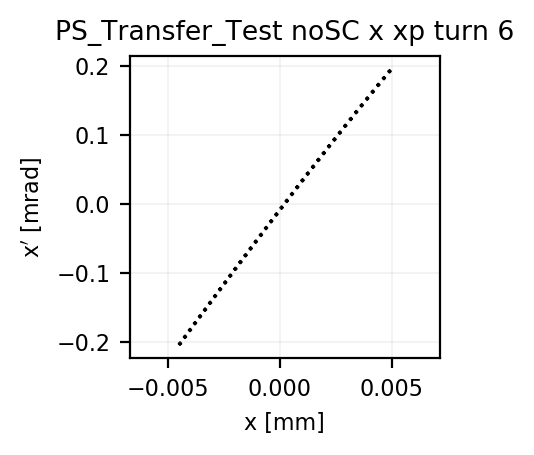

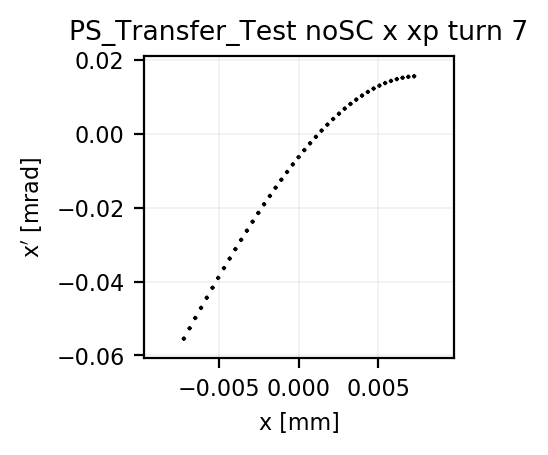

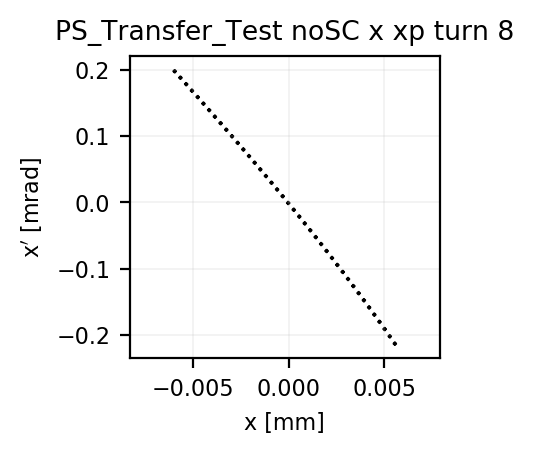

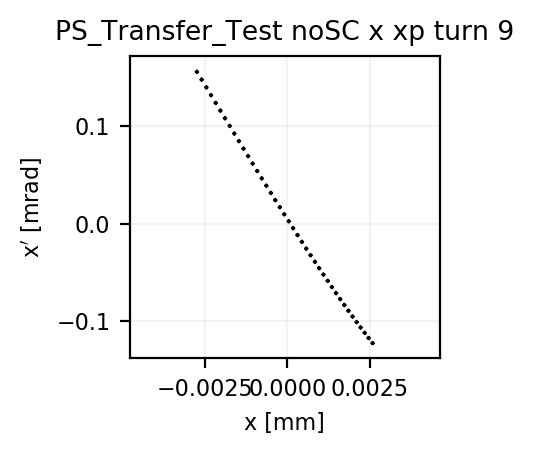

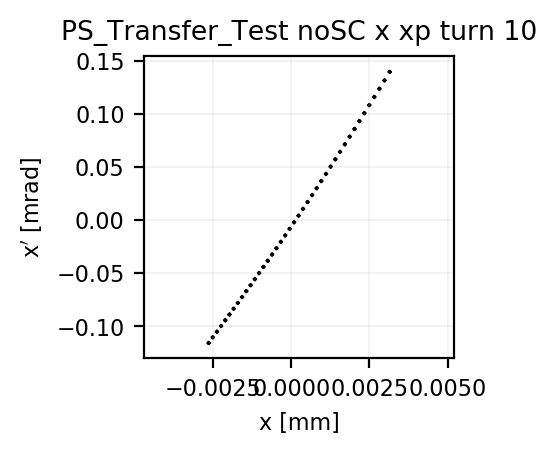

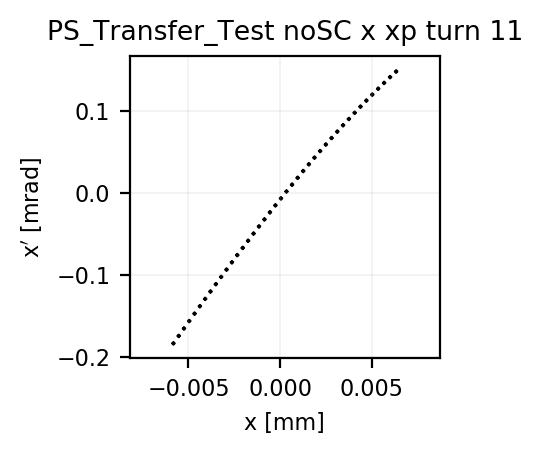

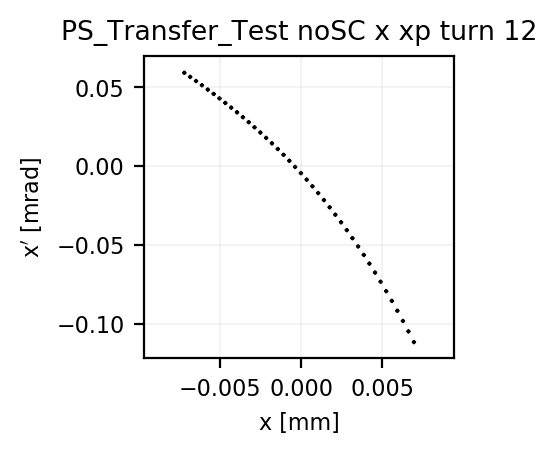

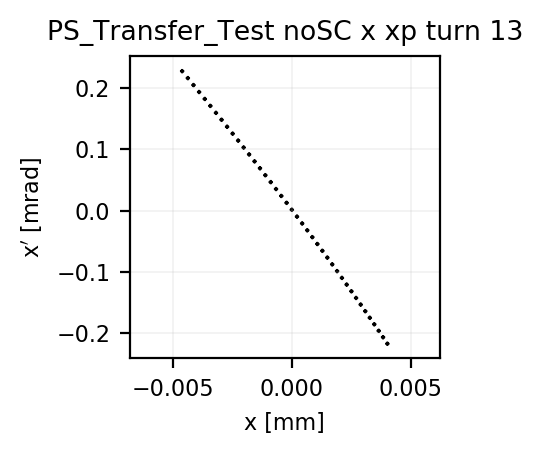

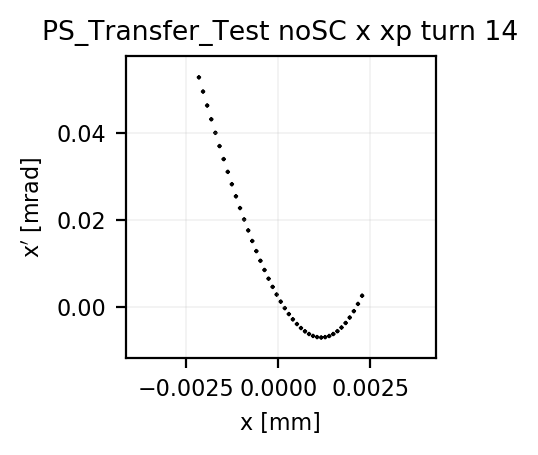

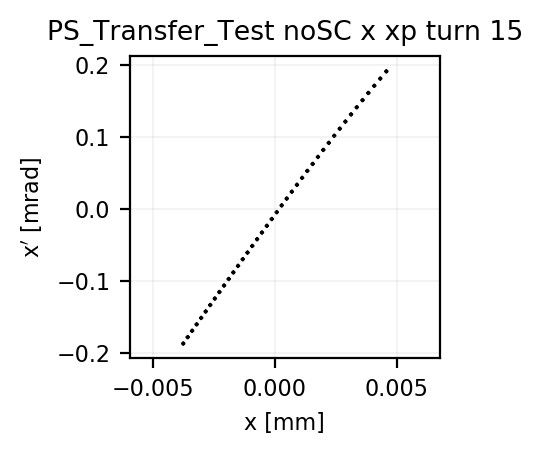

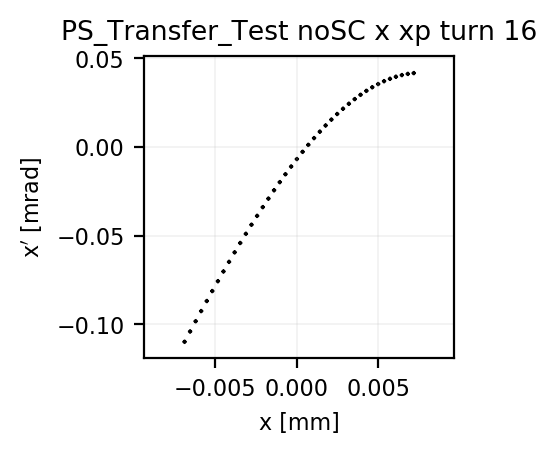

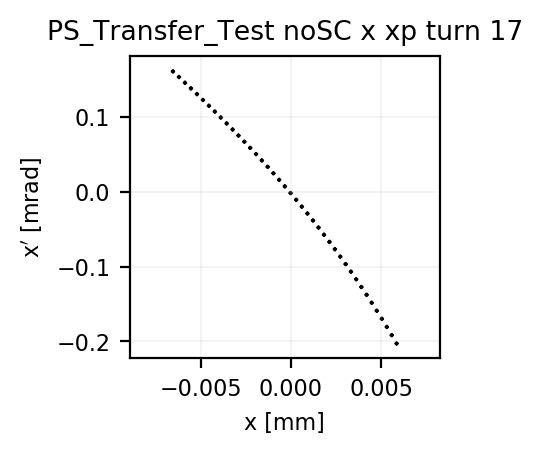

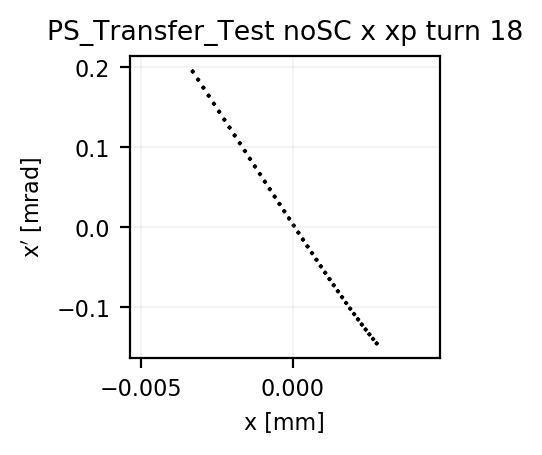

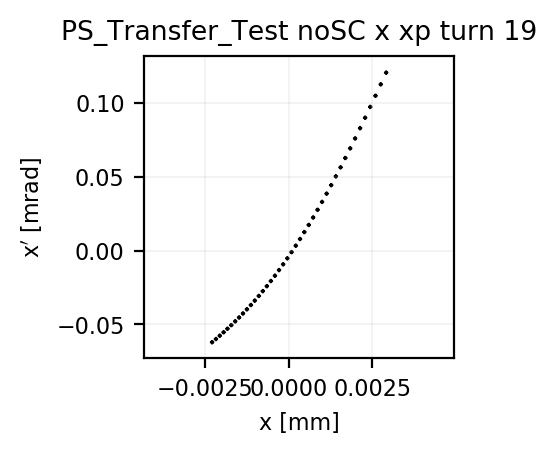

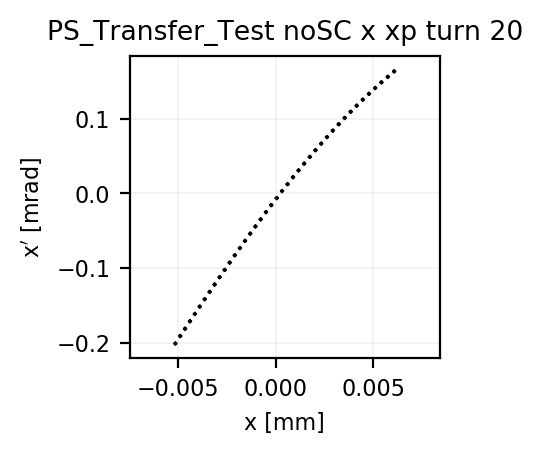

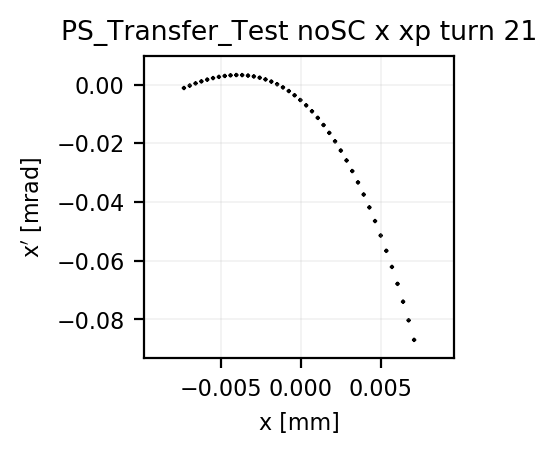

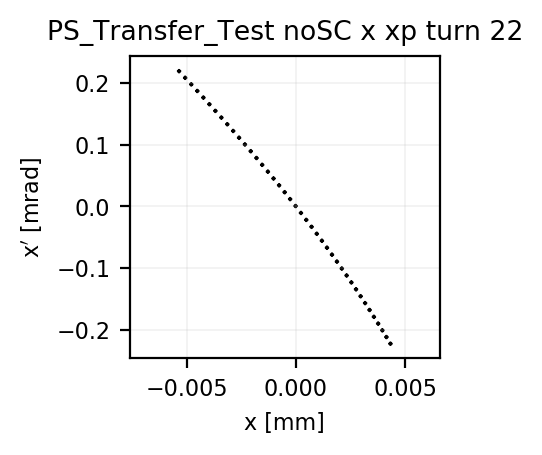

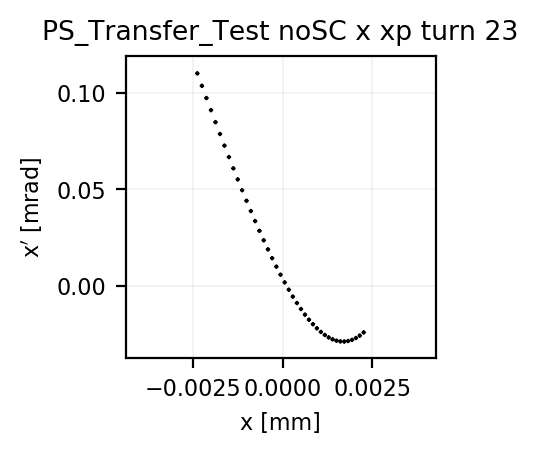

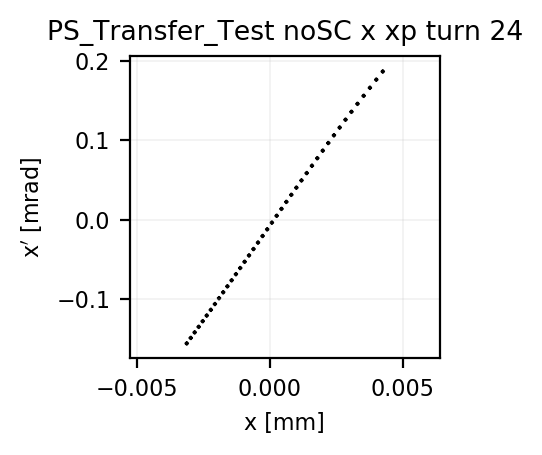

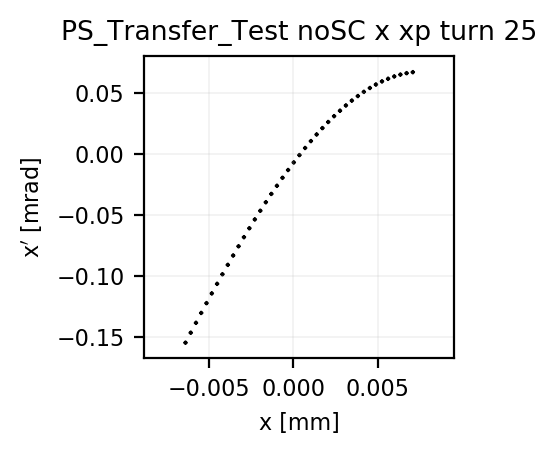

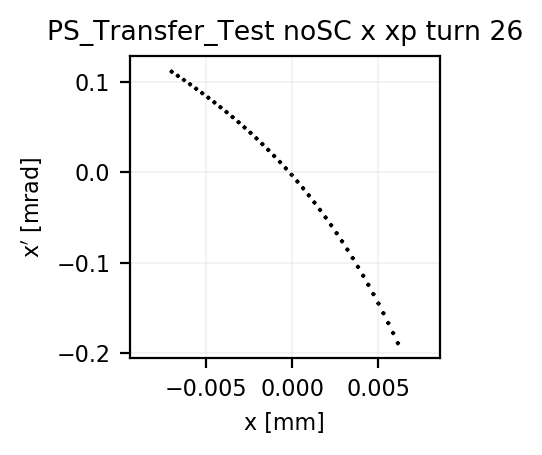

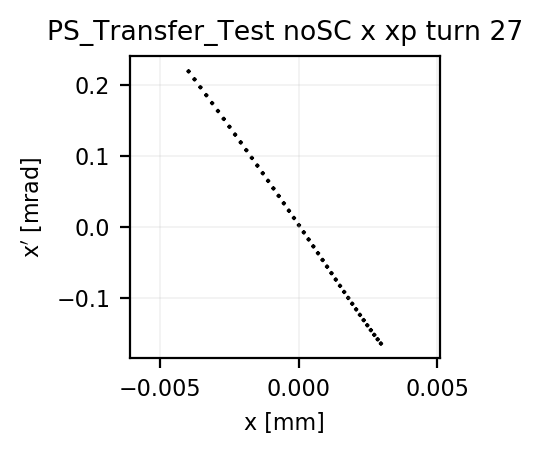

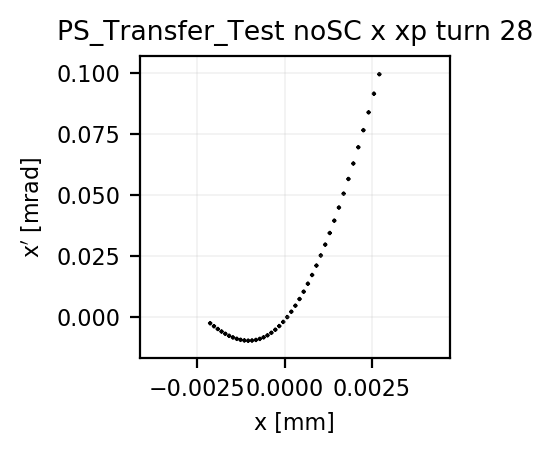

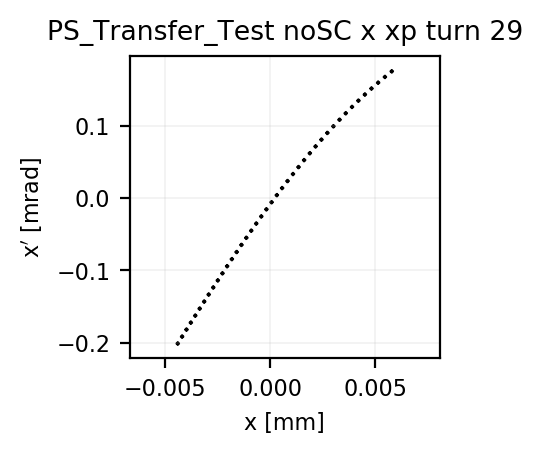

In [19]:
plt.rcParams['figure.figsize'] = [2.0, 2.0]
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200

plt.rcParams['font.size'] = 8
plt.rcParams['legend.fontsize'] = 'medium'
plt.rcParams['lines.linewidth'] = 1
parameter1 = 'x'
parameter2 = 'xp'
multi1 = 1
multi2 = 1E3

closed_orbit_x = -0.000669
closed_orbit_xp = 0.000044

for key, value in sorted(dd.iteritems()):
    
    fig1, ax1 = plt.subplots(1)

    tit = main_label + ' ' + sc + ' ' + parameter1 + ' ' + parameter2 + ' turn ' + str(key)
    
    ax1.set_title(tit);

    ax1.set_xlabel('x [mm]');
    ax1.set_ylabel(r'x$^{\prime}$ [mrad]');

    #colors = cm.rainbow(np.linspace(0, 1, len(dd.keys())))
    #c_it = int(0)

    s = np.ones(len(dd[key]['particles'][parameter1][0][0][0]))

    ax1.scatter((dd[key]['particles'][parameter1][0][0][0]-closed_orbit_x)*multi1, (dd[key]['particles'][parameter2][0][0][0] - closed_orbit_xp)*multi2, color='k', marker='x', s=s);
    #c_it = c_it + 1

    #ax1.legend(fontsize='x-small', loc=4, title=legend_label)
    ax1.grid(linewidth=0.1)
    #ax1.set_xlim(-2E-3, 2E-3)
    #ax1.set_xlim(-10, 10)

    #savename = 'Plots/x_xp/' + parameter1 + ' ' +  parameter2 + 'turn_' + str(int(key)) + '_V_bw.png'
    
    #bw_gifnames_x_xp.append(savename)
    
    #fig1.savefig(savename, dpi = 100)
    #plt.close()

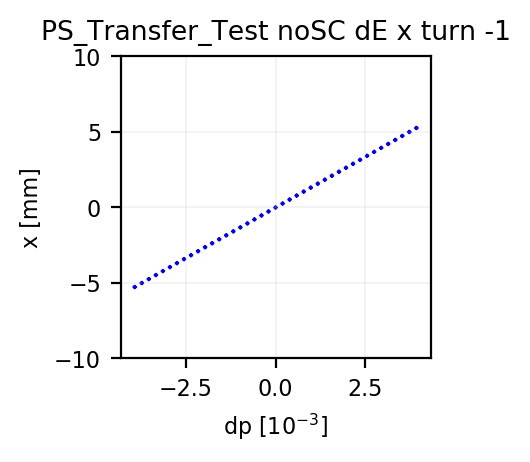

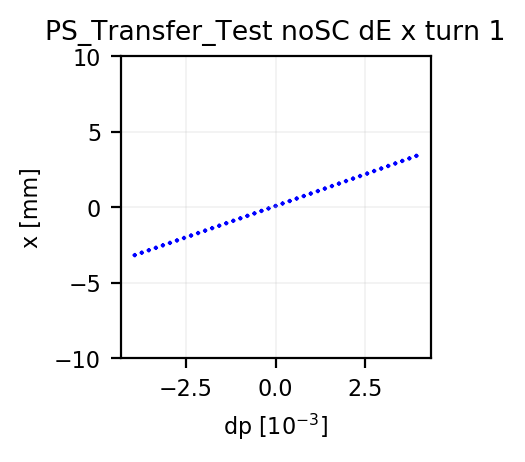

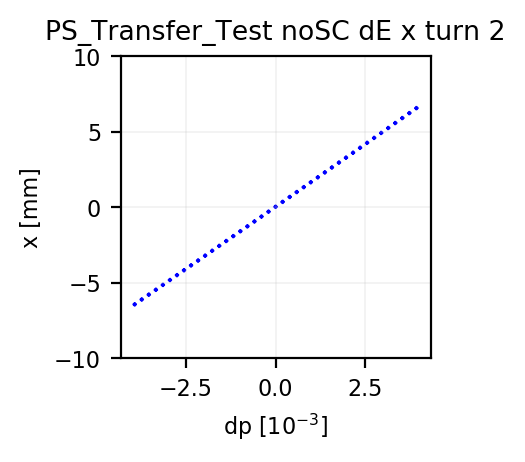

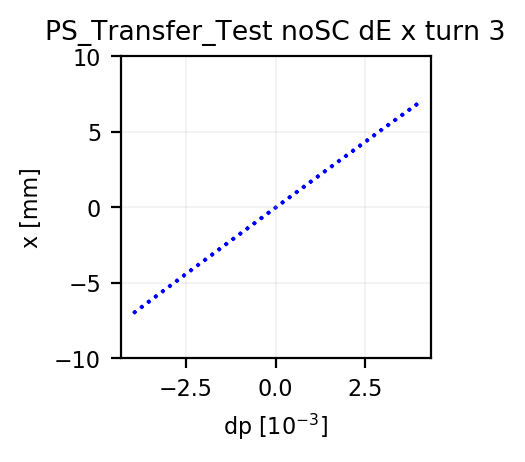

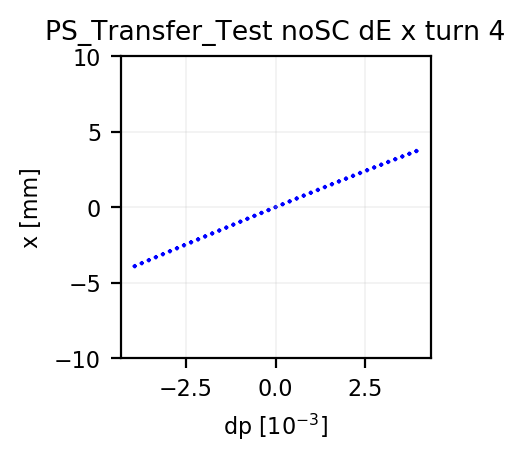

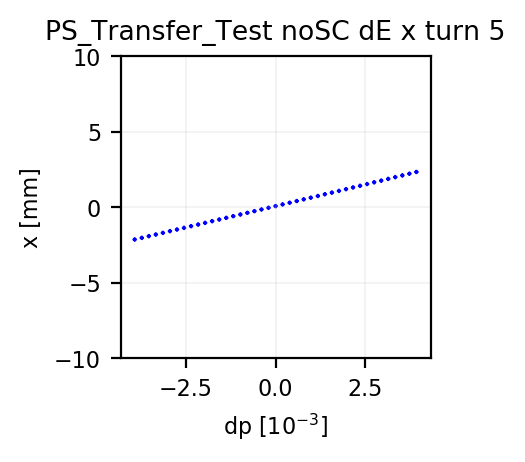

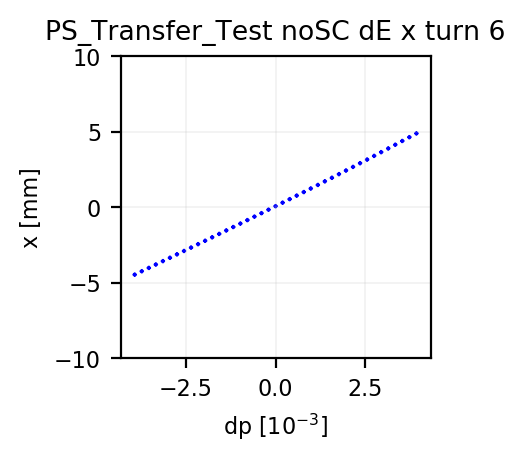

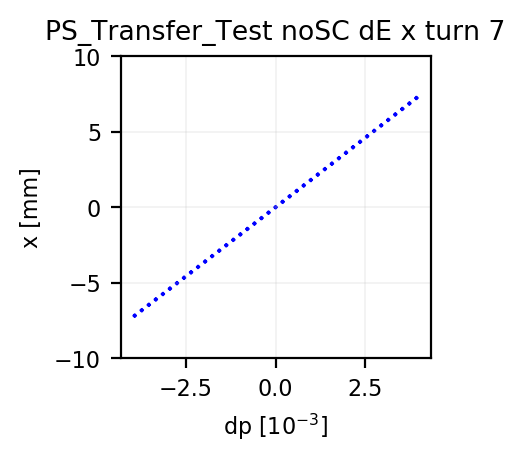

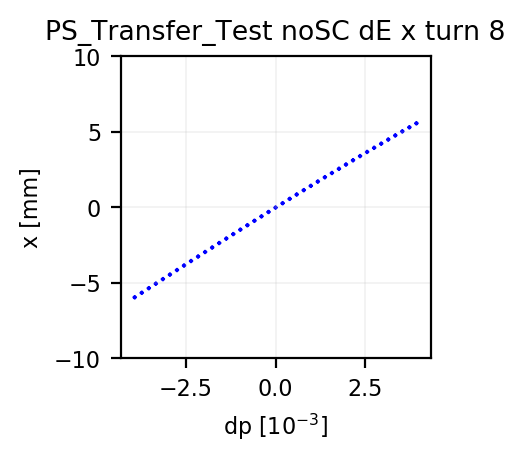

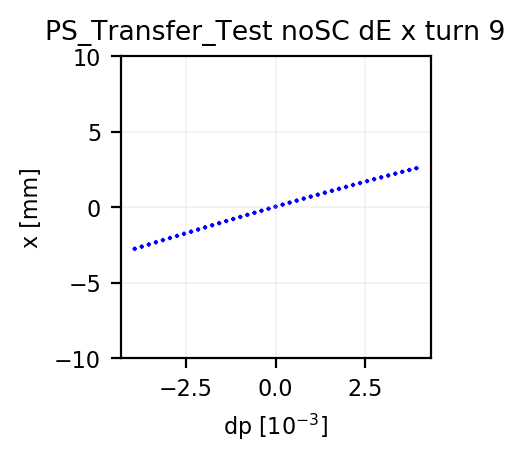

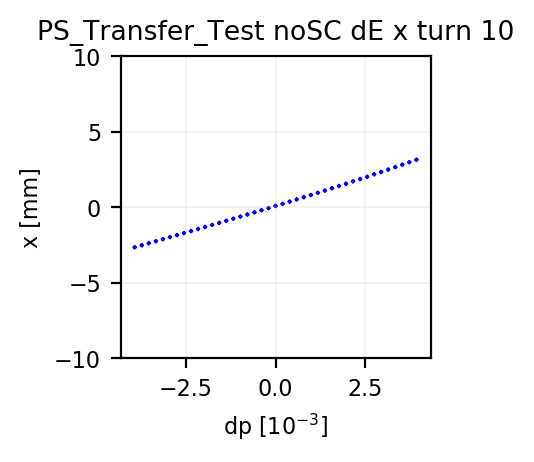

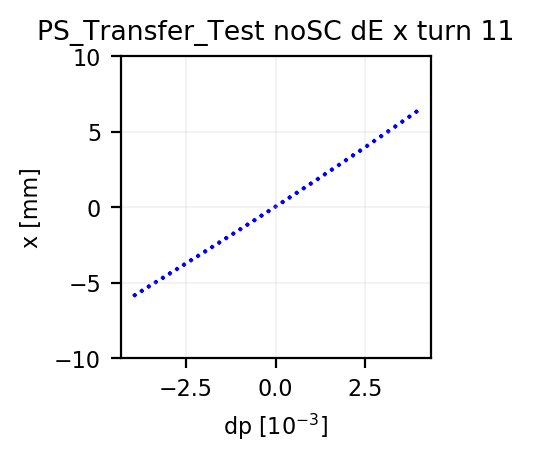

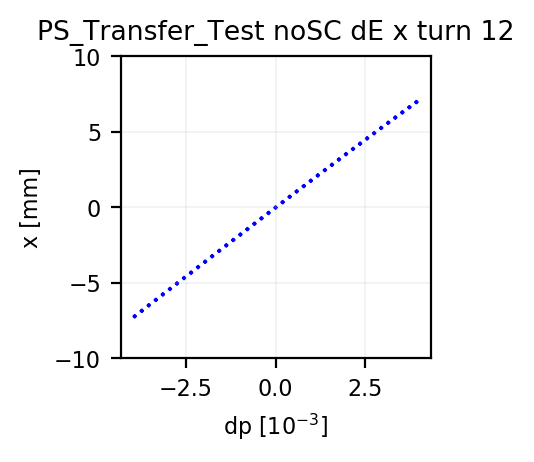

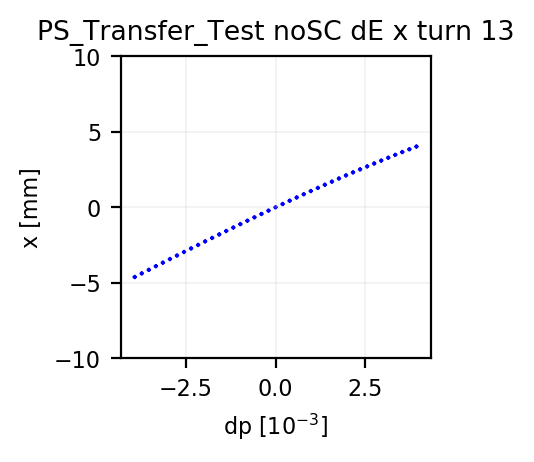

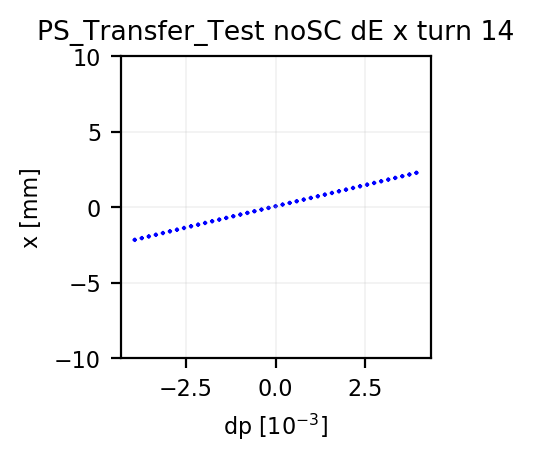

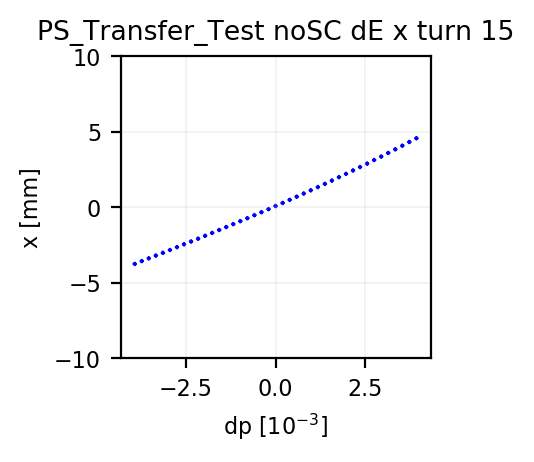

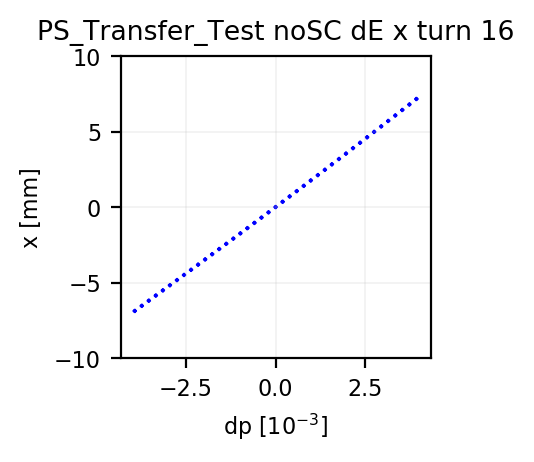

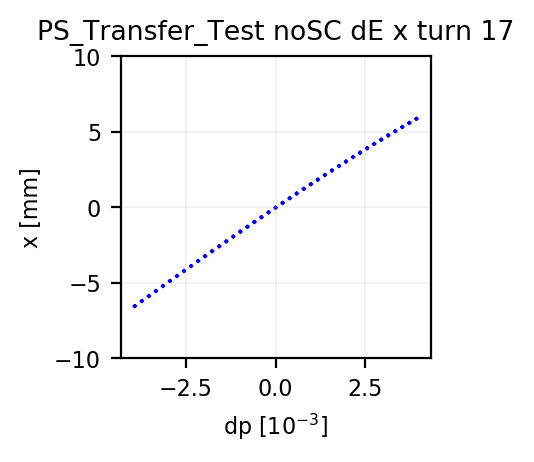

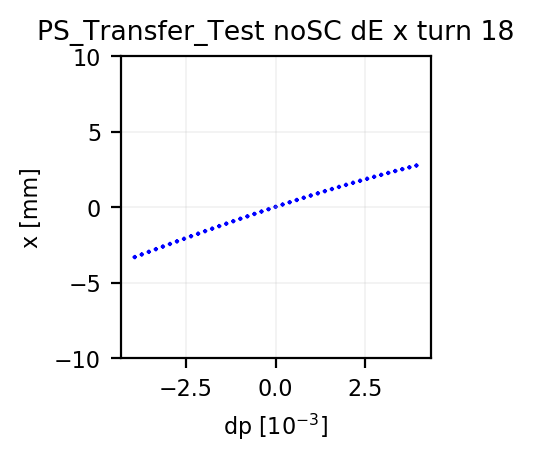

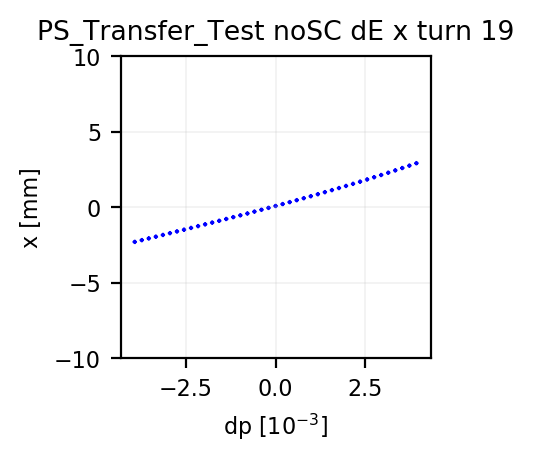

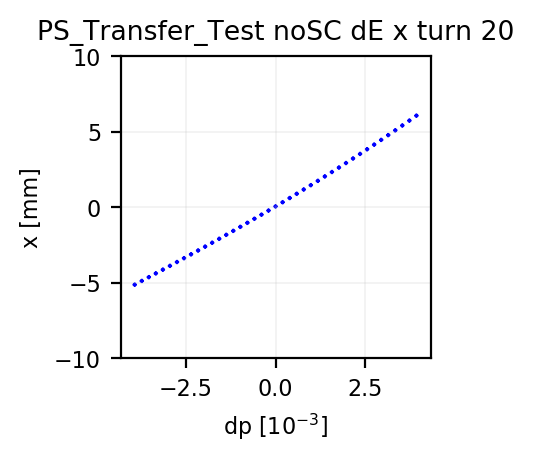

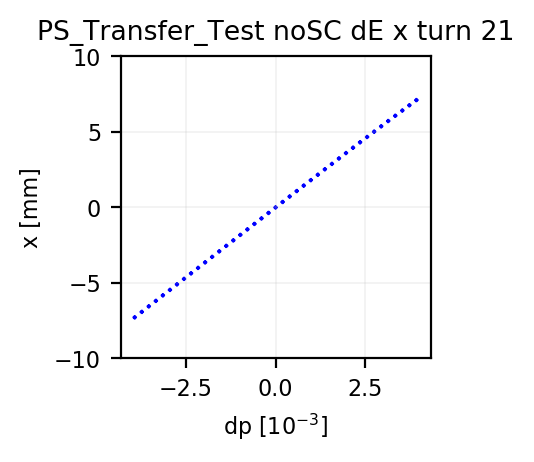

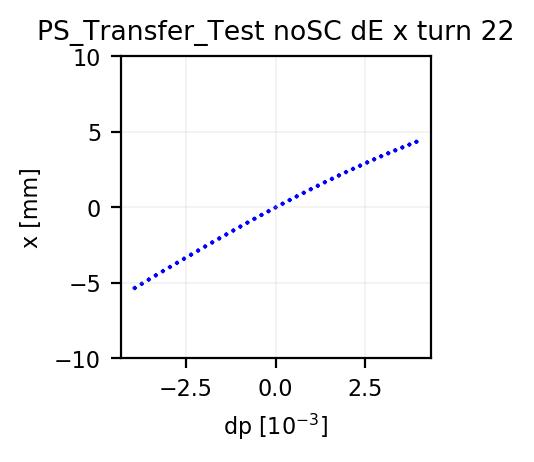

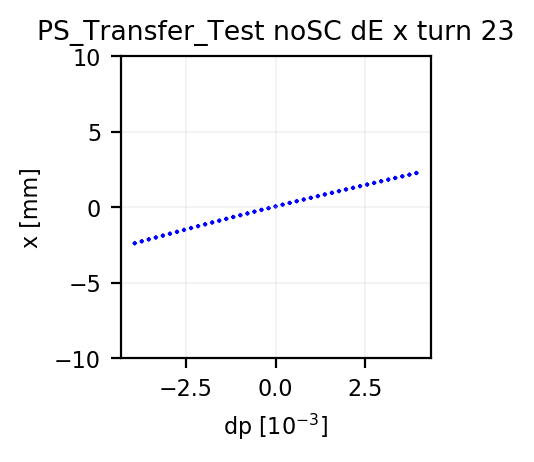

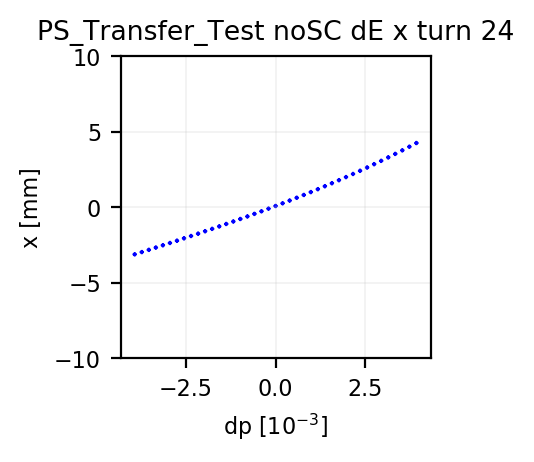

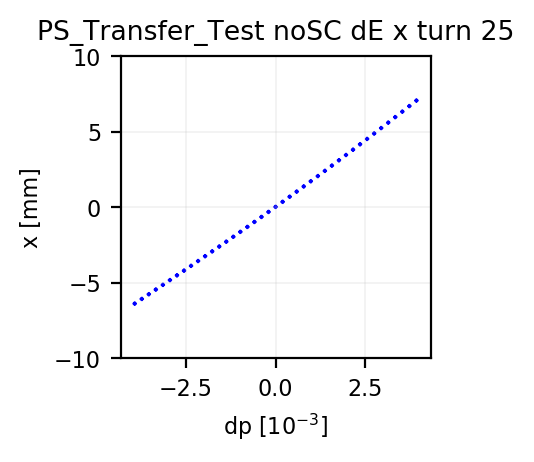

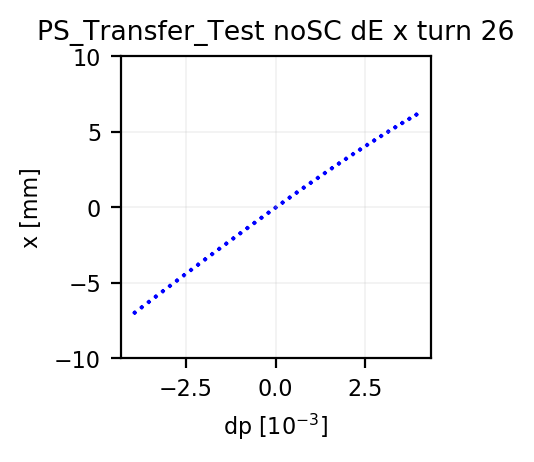

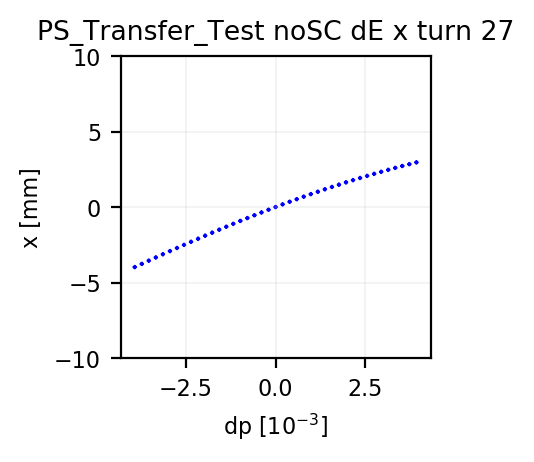

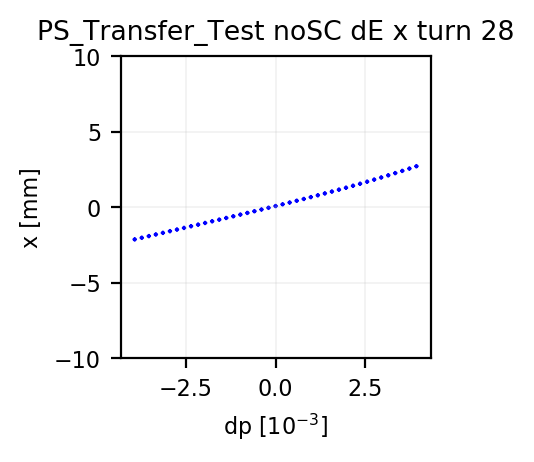

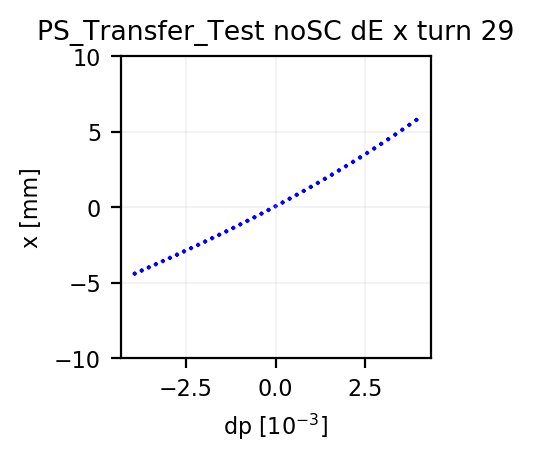

In [20]:
parameter1 = 'dE'
parameter2 = 'x'
multi1 = 1E3
multi2 = 1E3

for key, value in sorted(dd.iteritems()):
    
    fig1, ax1 = plt.subplots(1)

    tit = main_label + ' ' + sc + ' ' + parameter1 + ' ' + parameter2 + ' turn ' + str(key)
    
    ax1.set_title(tit);

    ax1.set_xlabel(r'dp [$10^{-3}$]');
    ax1.set_ylabel('x [mm]');

    #colors = cm.rainbow(np.linspace(0, 1, len(dd.keys())))
    #c_it = int(0)

    s = np.ones(len(dd[key]['particles'][parameter1][0][0][0]))

    ax1.scatter(dd[key]['particles'][parameter1][0][0][0]*multi1, (dd[key]['particles'][parameter2][0][0][0]-closed_orbit_x)*multi2, color='b', marker='x', s=s);
    #c_it = c_it + 1

    #ax1.legend(fontsize='x-small', loc=4, title=legend_label)
    ax1.grid(linewidth=0.1)
    #ax1.set_xlim(-2E-3, 2E-3)
    ax1.set_ylim(-10, 10)

    #savename = 'Plots/x_xp/' + parameter1 + ' ' +  parameter2 + 'turn_' + str(int(key)) + '_V_bw.png'
    
    #bw_gifnames_x_xp.append(savename)
    
    #fig1.savefig(savename, dpi = 100)
    #plt.close()

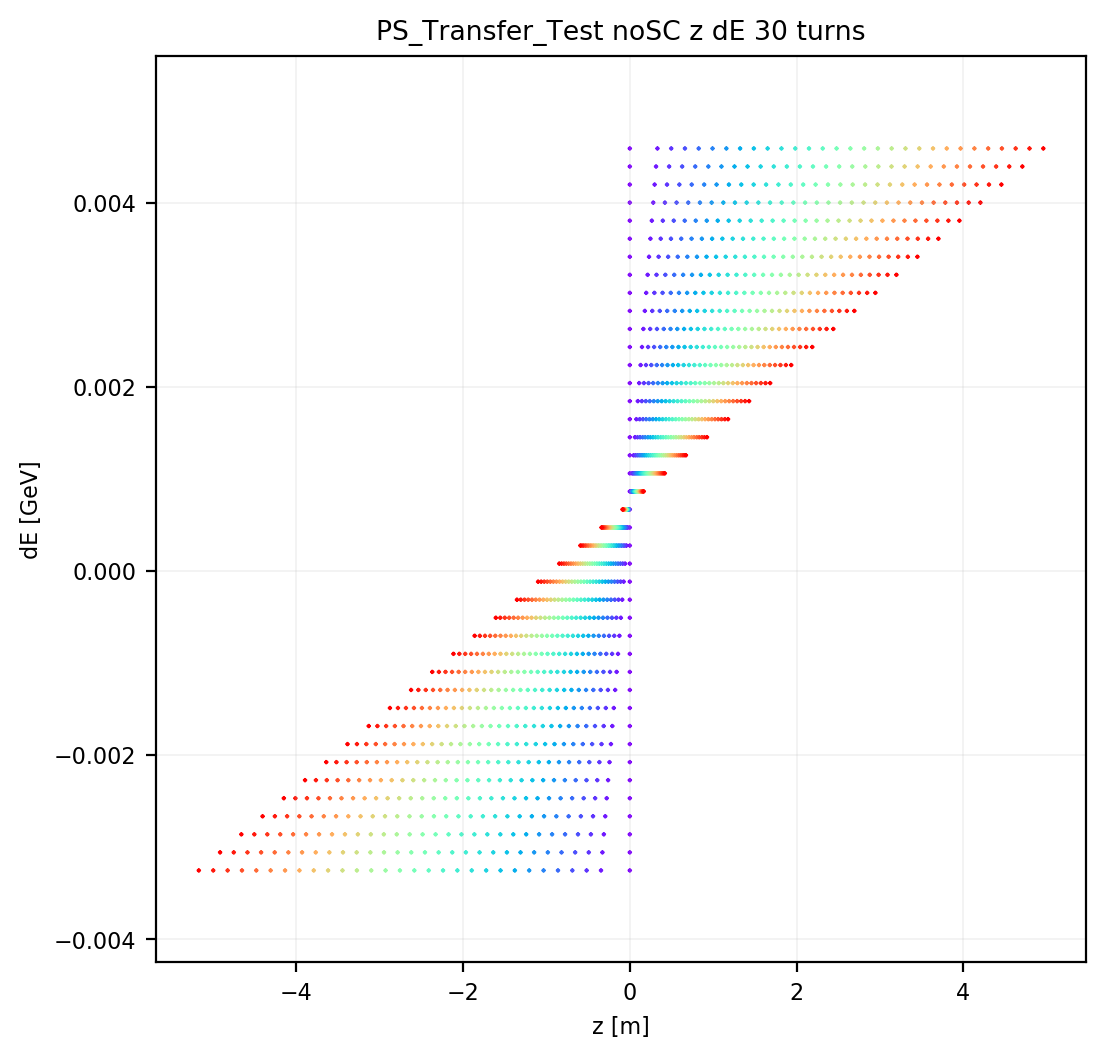

In [21]:
plt.rcParams['figure.figsize'] = [6.0, 6.0]
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200

plt.rcParams['font.size'] = 8
plt.rcParams['legend.fontsize'] = 'medium'
plt.rcParams['lines.linewidth'] = 1

parameter1 = 'z'
parameter2 = 'dE'
multi1 = 1
multi2 = 1
    
fig1, ax1 = plt.subplots(1)

tit = main_label + ' ' + sc + ' ' + parameter1 + ' ' + parameter2 + ' ' + str(len(dd.keys())) + ' turns'

ax1.set_title(tit);

ax1.set_xlabel('z [m]');
ax1.set_ylabel('dE [GeV]');

colors = cm.rainbow(np.linspace(0, 1, len(dd.keys())))
c_it = int(0)

s = np.ones(len(dd[key]['particles'][parameter1][0][0][0]))

for key, value in sorted(dd.iteritems()):
    ax1.scatter(dd[key]['particles'][parameter1][0][0][0]*multi1, (dd[key]['particles'][parameter2][0][0][0]-closed_orbit_x)*multi2, color=colors[c_it], marker='x', s=s);
    c_it = c_it + 1

#ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid(linewidth=0.1)
#ax1.set_xlim(-2E-3, 2E-3)
#ax1.set_ylim(-10, 10)

#savename = 'Plots/x_xp/' + parameter1 + ' ' +  parameter2 + 'turn_' + str(int(key)) + '_V_bw.png'

#fig1.savefig(savename, dpi = 100)
#plt.close()

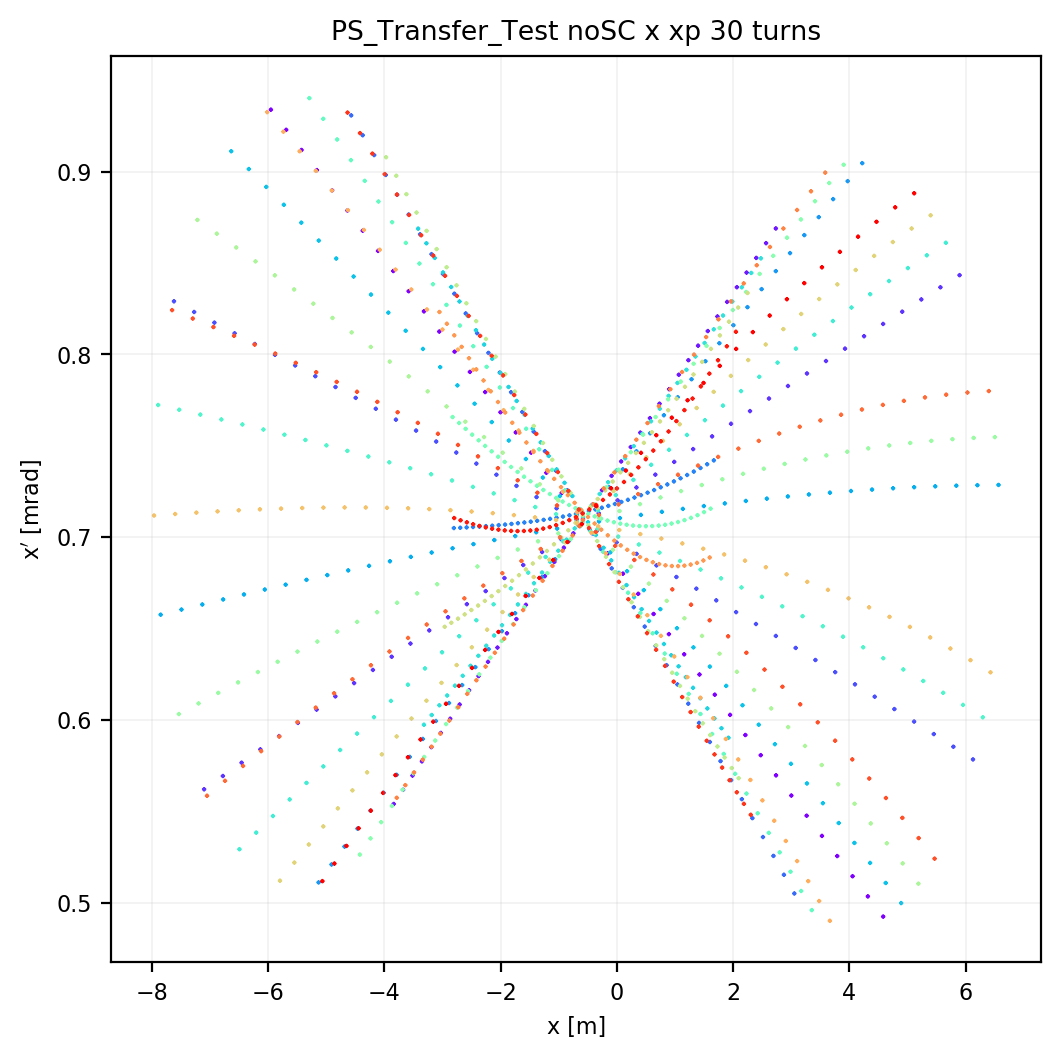

In [22]:
plt.rcParams['figure.figsize'] = [6.0, 6.0]
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200

plt.rcParams['font.size'] = 8
plt.rcParams['legend.fontsize'] = 'medium'
plt.rcParams['lines.linewidth'] = 1

parameter1 = 'x'
parameter2 = 'xp'
multi1 = 1E3
multi2 = 1E3
    
fig1, ax1 = plt.subplots(1)

tit = main_label + ' ' + sc + ' ' + parameter1 + ' ' + parameter2 + ' ' + str(len(dd.keys())) + ' turns'

ax1.set_title(tit);

#ax1.set_xlabel('z [m]');
#ax1.set_ylabel('dE [GeV]');
ax1.set_xlabel('x [m]');
ax1.set_ylabel(r'x$^{\prime}$ [mrad]');

colors = cm.rainbow(np.linspace(0, 1, len(dd.keys())))
c_it = int(0)

s = np.ones(len(dd[key]['particles'][parameter1][0][0][0]))

for key, value in sorted(dd.iteritems()):
    ax1.scatter(dd[key]['particles'][parameter1][0][0][0]*multi1, (dd[key]['particles'][parameter2][0][0][0]-closed_orbit_x)*multi2, color=colors[c_it], marker='x', s=s);
    c_it = c_it + 1

#ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid(linewidth=0.1)
#ax1.set_xlim(-2E-3, 2E-3)
#ax1.set_ylim(-10, 10)

#savename = 'Plots/x_xp/' + parameter1 + ' ' +  parameter2 + 'turn_' + str(int(key)) + '_V_bw.png'

#fig1.savefig(savename, dpi = 100)
#plt.close()

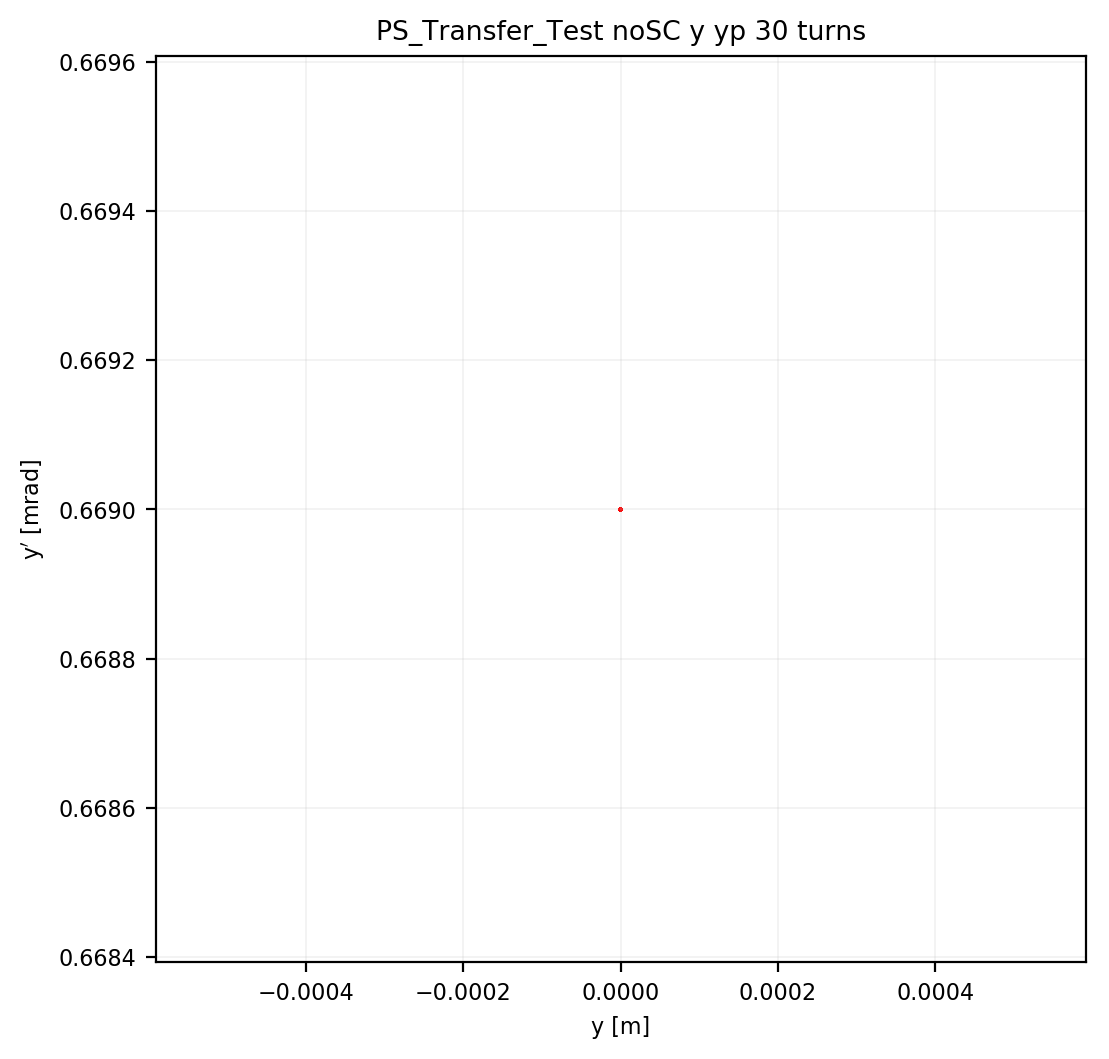

In [23]:
plt.rcParams['figure.figsize'] = [6.0, 6.0]
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200

plt.rcParams['font.size'] = 8
plt.rcParams['legend.fontsize'] = 'medium'
plt.rcParams['lines.linewidth'] = 1

parameter1 = 'y'
parameter2 = 'yp'
multi1 = 1E3
multi2 = 1E3
    
fig1, ax1 = plt.subplots(1)

tit = main_label + ' ' + sc + ' ' + parameter1 + ' ' + parameter2 + ' ' + str(len(dd.keys())) + ' turns'

ax1.set_title(tit);

#ax1.set_xlabel('z [m]');
#ax1.set_ylabel('dE [GeV]');
ax1.set_xlabel('y [m]');
ax1.set_ylabel(r'y$^{\prime}$ [mrad]');

colors = cm.rainbow(np.linspace(0, 1, len(dd.keys())))
c_it = int(0)

s = np.ones(len(dd[key]['particles'][parameter1][0][0][0]))

for key, value in sorted(dd.iteritems()):
    ax1.scatter(dd[key]['particles'][parameter1][0][0][0]*multi1, (dd[key]['particles'][parameter2][0][0][0]-closed_orbit_x)*multi2, color=colors[c_it], marker='x', s=s);
    c_it = c_it + 1

#ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid(linewidth=0.1)
#ax1.set_xlim(-2E-3, 2E-3)
#ax1.set_ylim(-10, 10)

#savename = 'Plots/x_xp/' + parameter1 + ' ' +  parameter2 + 'turn_' + str(int(key)) + '_V_bw.png'

#fig1.savefig(savename, dpi = 100)
#plt.close()

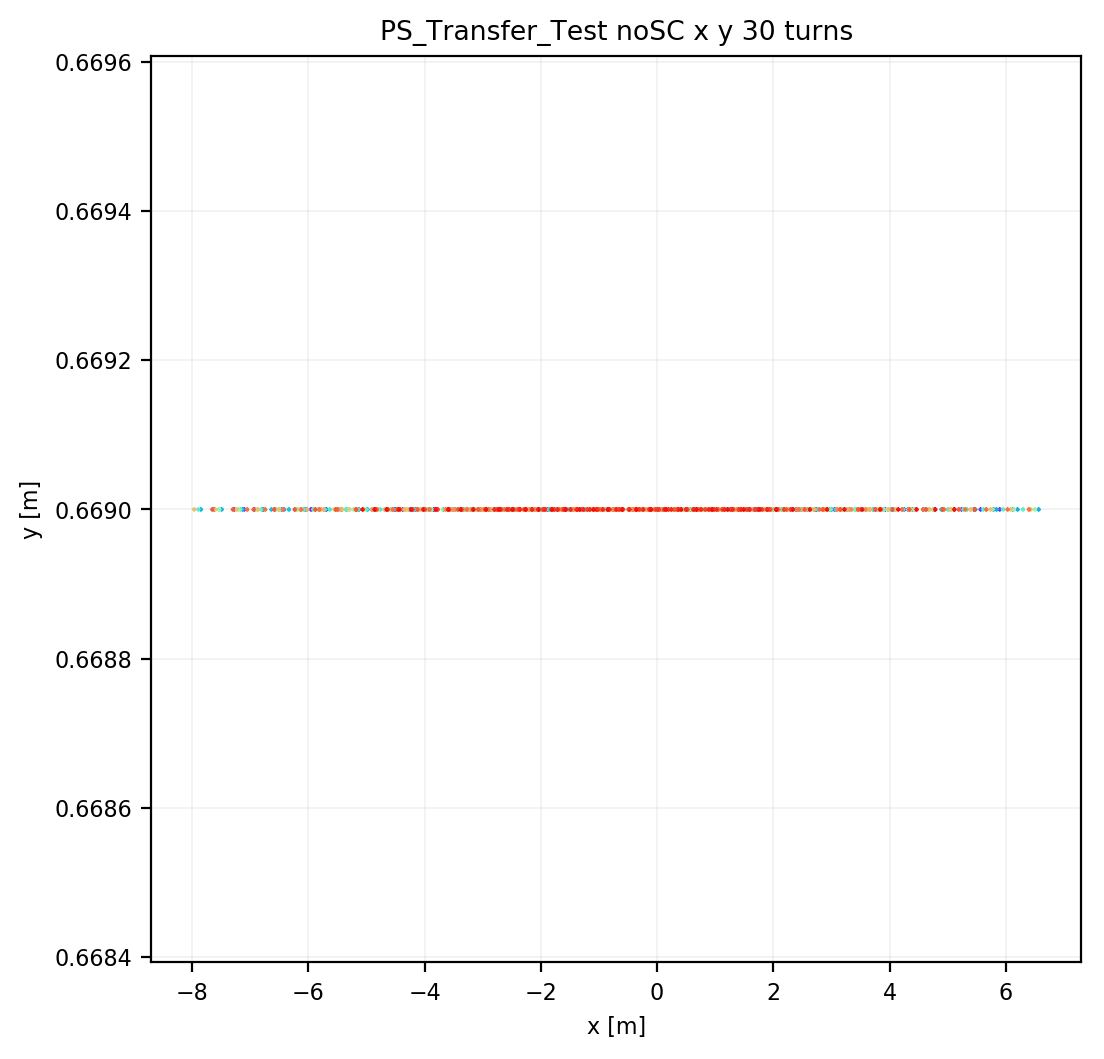

In [24]:
plt.rcParams['figure.figsize'] = [6.0, 6.0]
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200

plt.rcParams['font.size'] = 8
plt.rcParams['legend.fontsize'] = 'medium'
plt.rcParams['lines.linewidth'] = 1

parameter1 = 'x'
parameter2 = 'y'
multi1 = 1E3
multi2 = 1E3
    
fig1, ax1 = plt.subplots(1)

tit = main_label + ' ' + sc + ' ' + parameter1 + ' ' + parameter2 + ' ' + str(len(dd.keys())) + ' turns'

ax1.set_title(tit);

#ax1.set_xlabel('z [m]');
#ax1.set_ylabel('dE [GeV]');
ax1.set_xlabel('x [m]');
ax1.set_ylabel('y [m]');

colors = cm.rainbow(np.linspace(0, 1, len(dd.keys())))
c_it = int(0)

s = np.ones(len(dd[key]['particles'][parameter1][0][0][0]))

for key, value in sorted(dd.iteritems()):
    ax1.scatter(dd[key]['particles'][parameter1][0][0][0]*multi1, (dd[key]['particles'][parameter2][0][0][0]-closed_orbit_x)*multi2, color=colors[c_it], marker='x', s=s);
    c_it = c_it + 1

#ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid(linewidth=0.1)
#ax1.set_xlim(-2E-3, 2E-3)
#ax1.set_ylim(-10, 10)

#savename = 'Plots/x_xp/' + parameter1 + ' ' +  parameter2 + 'turn_' + str(int(key)) + '_V_bw.png'

#fig1.savefig(savename, dpi = 100)
#plt.close()

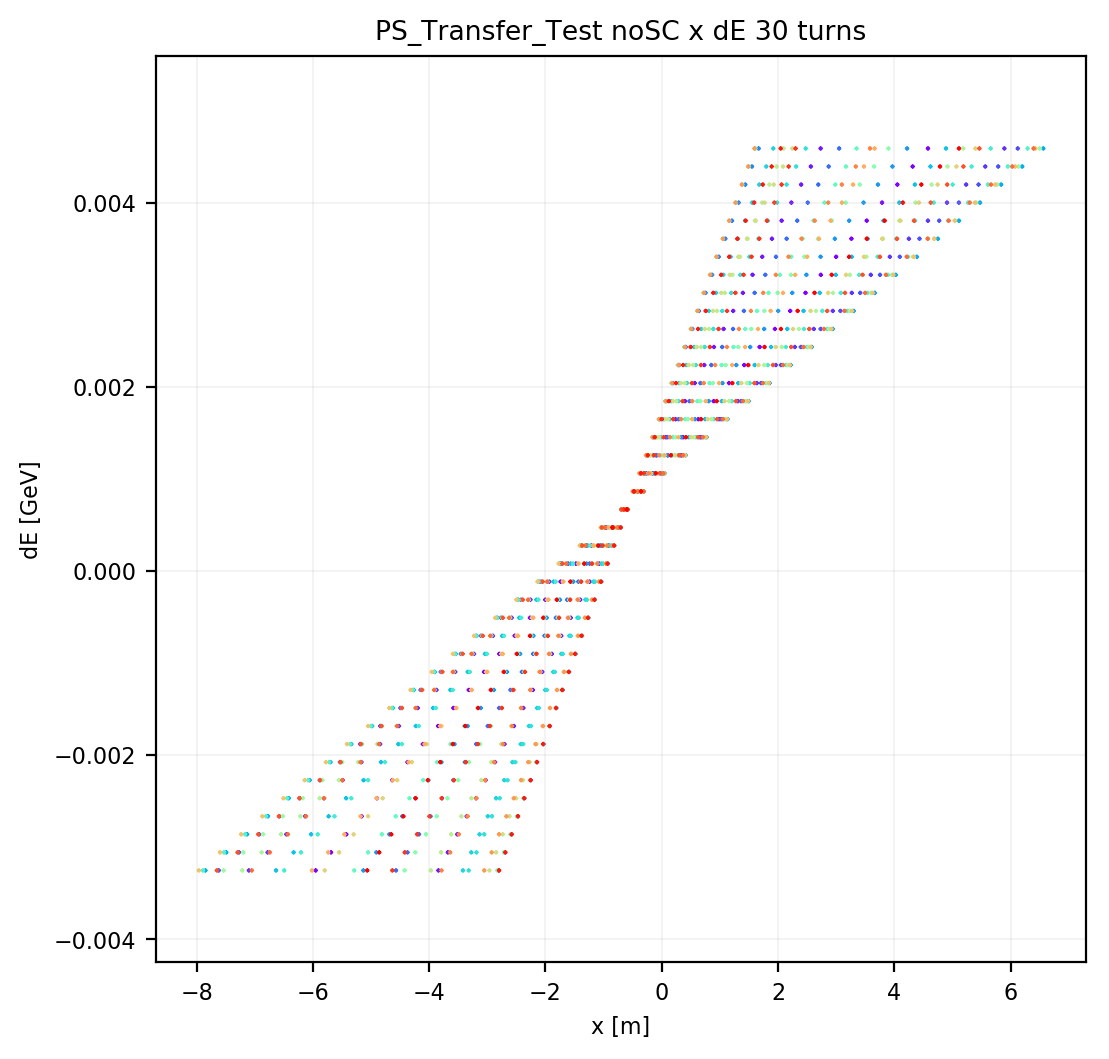

In [25]:
plt.rcParams['figure.figsize'] = [6.0, 6.0]
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200

plt.rcParams['font.size'] = 8
plt.rcParams['legend.fontsize'] = 'medium'
plt.rcParams['lines.linewidth'] = 1

parameter1 = 'x'
parameter2 = 'dE'
multi1 = 1E3
multi2 = 1
    
fig1, ax1 = plt.subplots(1)

tit = main_label + ' ' + sc + ' ' + parameter1 + ' ' + parameter2 + ' ' + str(len(dd.keys())) + ' turns'

ax1.set_title(tit);

#ax1.set_xlabel('z [m]');
ax1.set_ylabel('dE [GeV]');
ax1.set_xlabel('x [m]');
#ax1.set_ylabel('y [m]');

colors = cm.rainbow(np.linspace(0, 1, len(dd.keys())))
c_it = int(0)

s = np.ones(len(dd[key]['particles'][parameter1][0][0][0]))

for key, value in sorted(dd.iteritems()):
    ax1.scatter(dd[key]['particles'][parameter1][0][0][0]*multi1, (dd[key]['particles'][parameter2][0][0][0]-closed_orbit_x)*multi2, color=colors[c_it], marker='x', s=s);
    c_it = c_it + 1

#ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid(linewidth=0.1)
#ax1.set_xlim(-2E-3, 2E-3)
#ax1.set_ylim(-10, 10)

#savename = 'Plots/x_xp/' + parameter1 + ' ' +  parameter2 + 'turn_' + str(int(key)) + '_V_bw.png'

#fig1.savefig(savename, dpi = 100)
#plt.close()

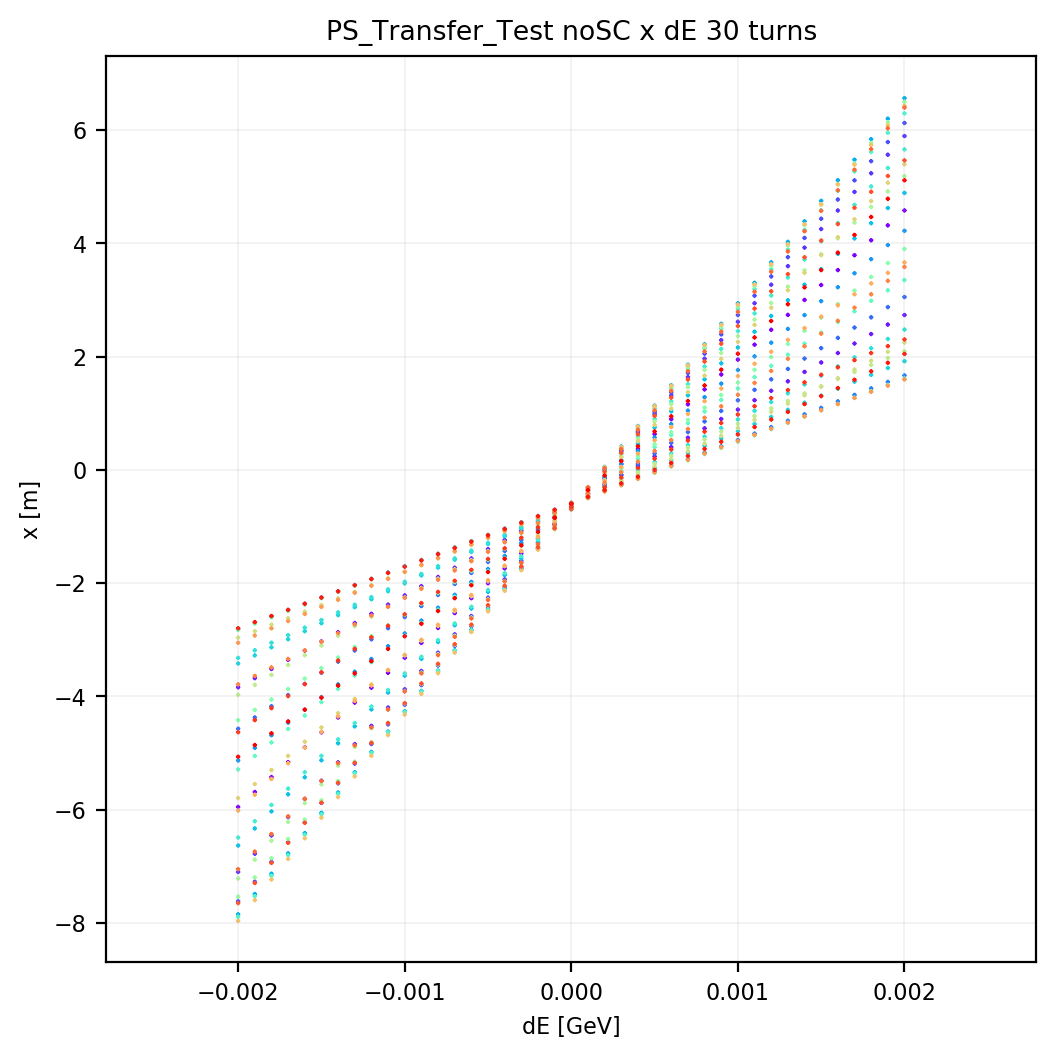

In [26]:
plt.rcParams['figure.figsize'] = [6.0, 6.0]
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200

plt.rcParams['font.size'] = 8
plt.rcParams['legend.fontsize'] = 'medium'
plt.rcParams['lines.linewidth'] = 1

parameter1 = 'x'
parameter2 = 'dE'
multi1 = 1E3
multi2 = 1
    
fig1, ax1 = plt.subplots(1)

tit = main_label + ' ' + sc + ' ' + parameter1 + ' ' + parameter2 + ' ' + str(len(dd.keys())) + ' turns'

ax1.set_title(tit);

#ax1.set_xlabel('z [m]');
ax1.set_xlabel('dE [GeV]');
ax1.set_ylabel('x [m]');
#ax1.set_ylabel('y [m]');

colors = cm.rainbow(np.linspace(0, 1, len(dd.keys())))
c_it = int(0)

s = np.ones(len(dd[key]['particles'][parameter1][0][0][0]))

for key, value in sorted(dd.iteritems()):
    ax1.scatter(((dd[-1]['particles']['dE'][0][0][0])/E/Beta**2)*multi2, dd[key]['particles'][parameter1][0][0][0]*multi1, color=colors[c_it], marker='x', s=s);
    c_it = c_it + 1

#ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid(linewidth=0.1)
#ax1.set_xlim(-2E-3, 2E-3)
#ax1.set_ylim(-10, 10)

#savename = 'Plots/x_xp/' + parameter1 + ' ' +  parameter2 + 'turn_' + str(int(key)) + '_V_bw.png'

#fig1.savefig(savename, dpi = 100)
#plt.close()

(-10, 10)

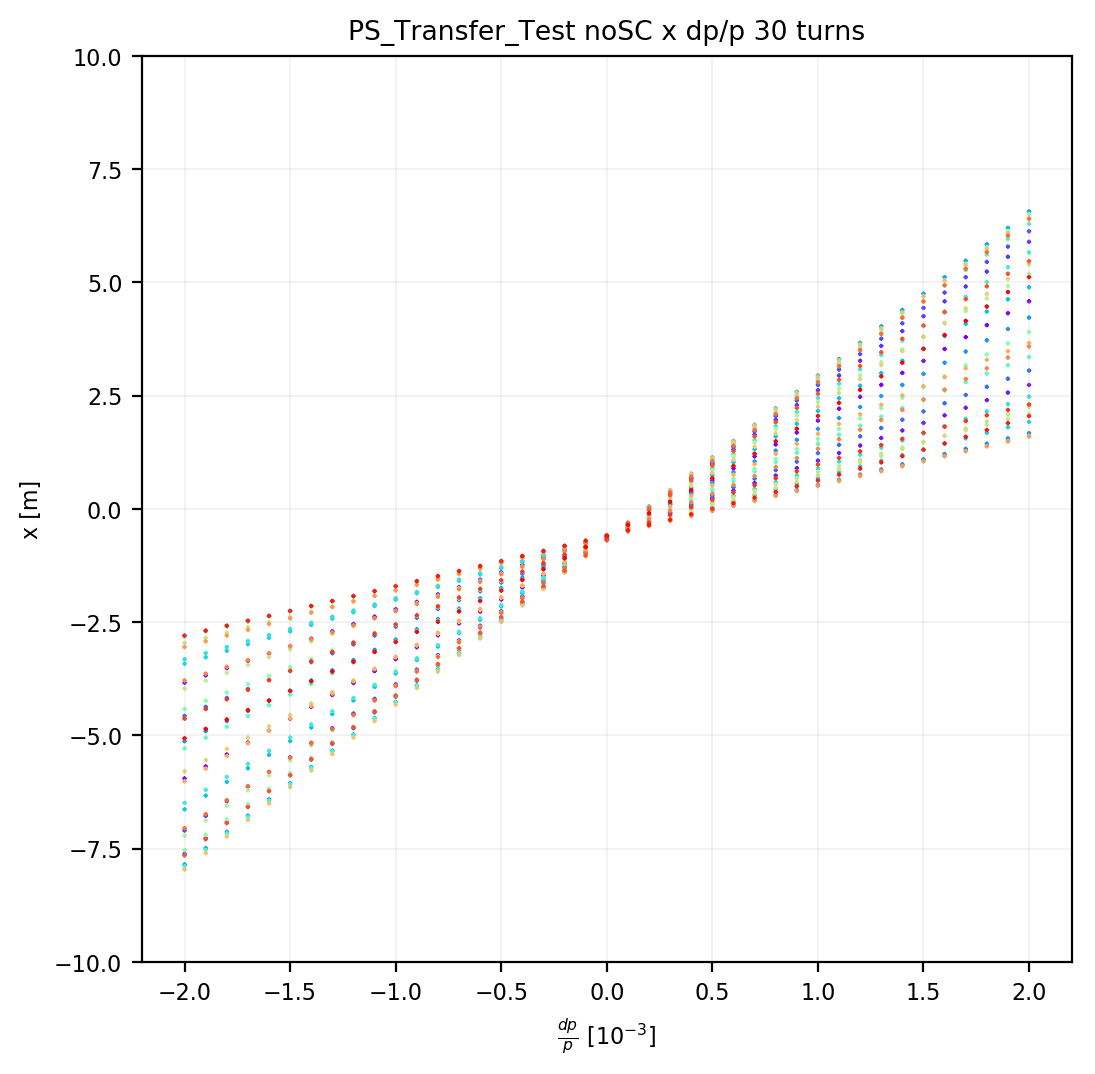

In [27]:
plt.rcParams['figure.figsize'] = [6.0, 6.0]
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200

plt.rcParams['font.size'] = 8
plt.rcParams['legend.fontsize'] = 'medium'
plt.rcParams['lines.linewidth'] = 1

parameter1 = 'x'
parameter2 = 'dE'
parameter3 = 'dp/p'
multi1 = 1E3
multi2 = 1E3
    
fig1, ax1 = plt.subplots(1)

tit = main_label + ' ' + sc + ' ' + parameter1 + ' ' + parameter3 + ' ' + str(len(dd.keys())) + ' turns'

ax1.set_title(tit);

ax1.set_xlabel(r'$\frac{dp}{p}$ [10$^{-3}$]');
ax1.set_ylabel('x [m]');

colors = cm.rainbow(np.linspace(0, 1, len(dd.keys())))
c_it = int(0)

s = np.ones(len(dd[key]['particles'][parameter1][0][0][0]))

for key, value in sorted(dd.iteritems()):
    ax1.scatter(((dd[-1]['particles']['dE'][0][0][0])/E/Beta**2)*multi2, dd[key]['particles'][parameter1][0][0][0]*multi1, color=colors[c_it], marker='x', s=s);
    c_it = c_it + 1

#ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid(linewidth=0.1)
#ax1.set_xlim(-2E-3, 2E-3)
ax1.set_ylim(-10, 10)

#savename = 'Plots/x_xp/' + parameter1 + ' ' +  parameter2 + 'turn_' + str(int(key)) + '_V_bw.png'

#fig1.savefig(savename, dpi = 100)
#plt.close()

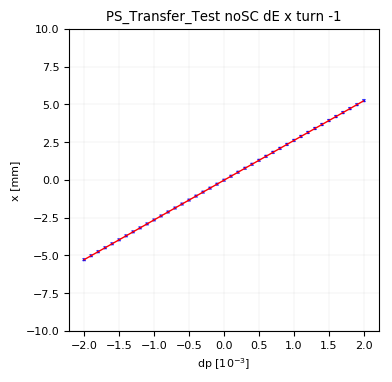

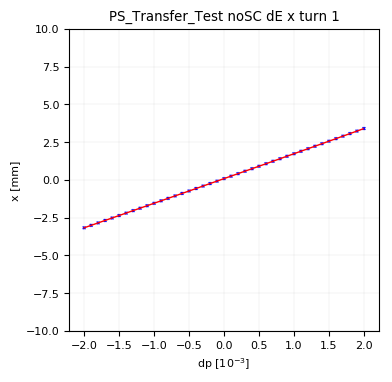

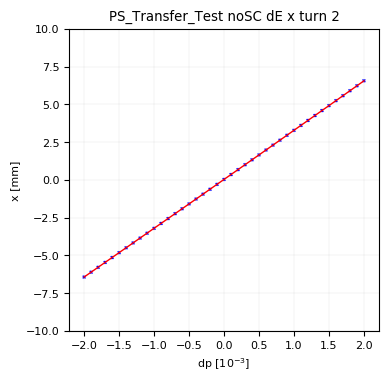

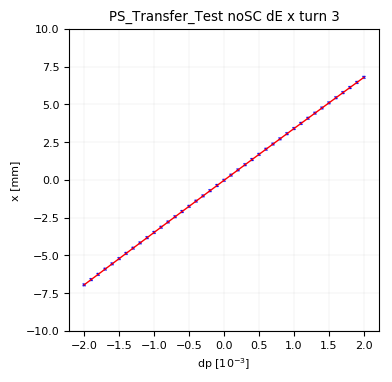

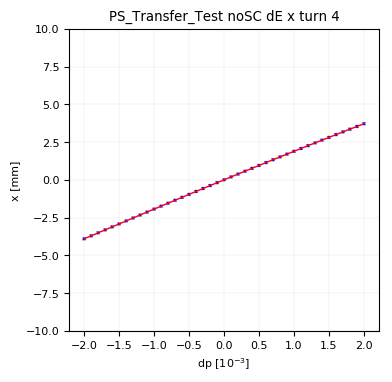

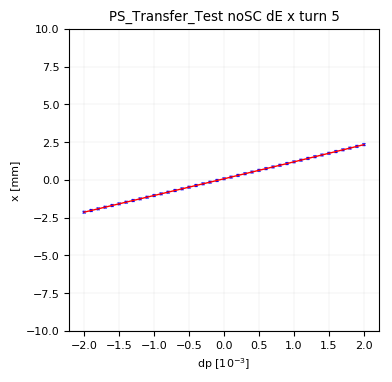

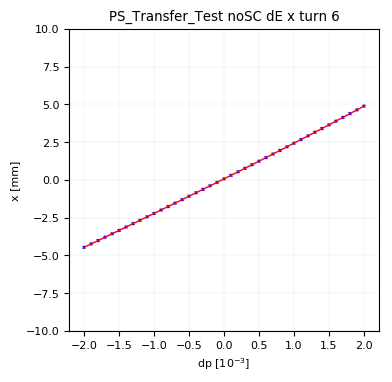

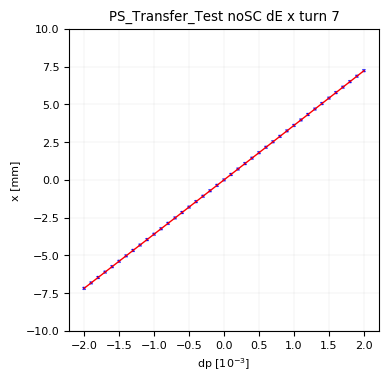

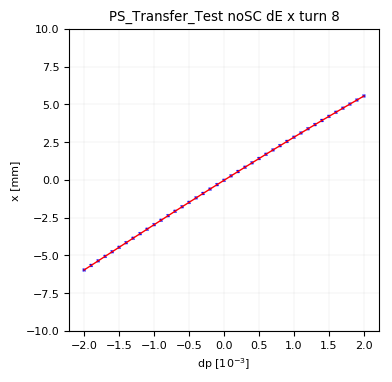

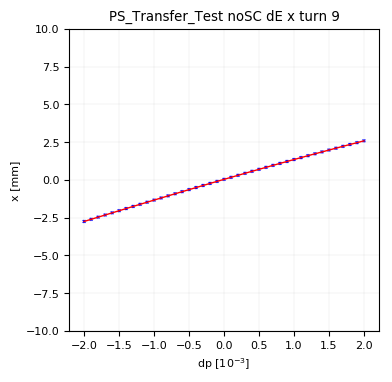

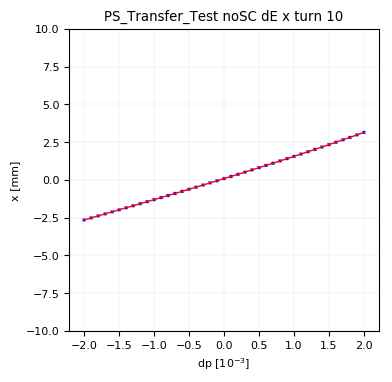

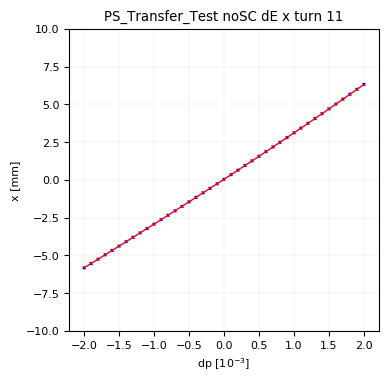

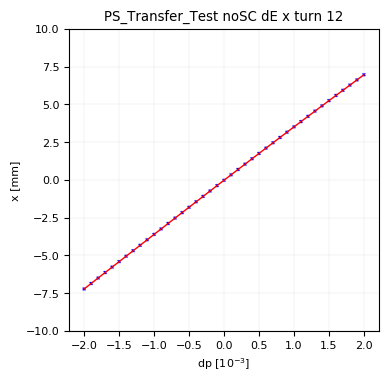

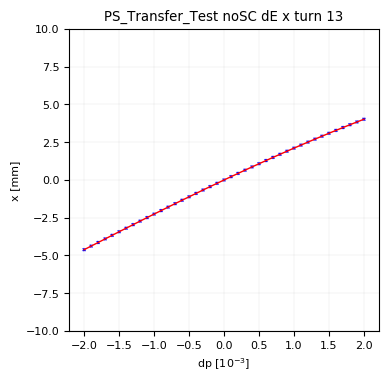

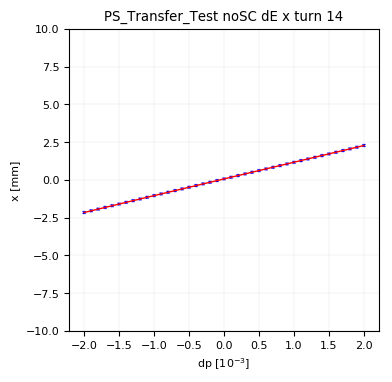

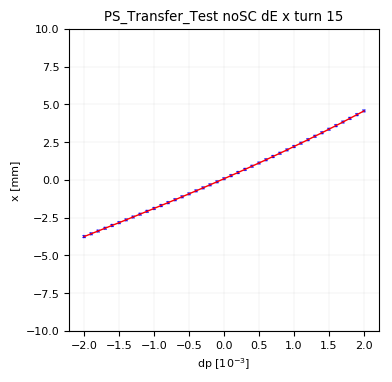

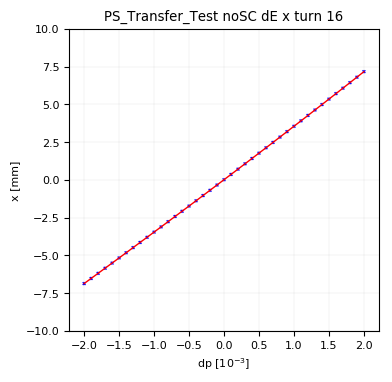

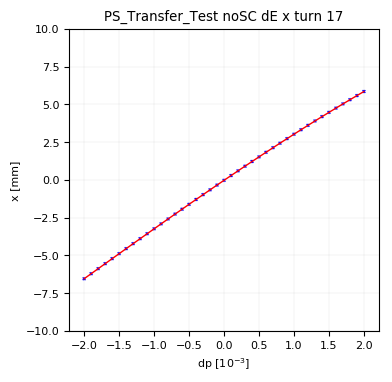

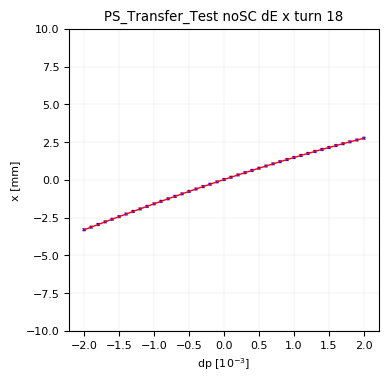

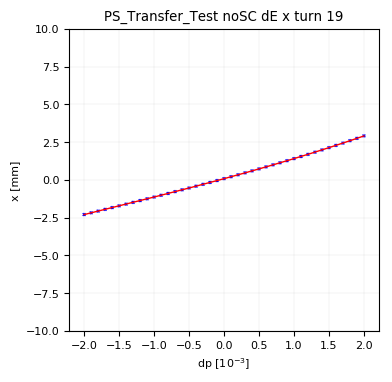

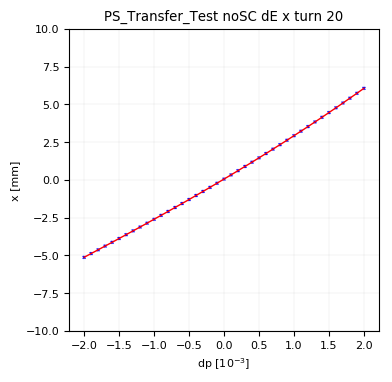

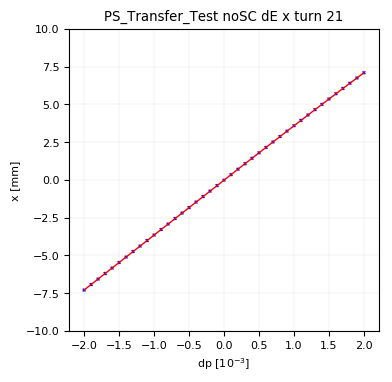

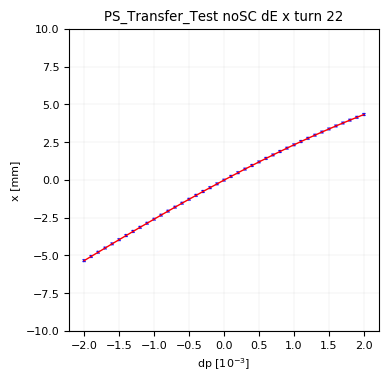

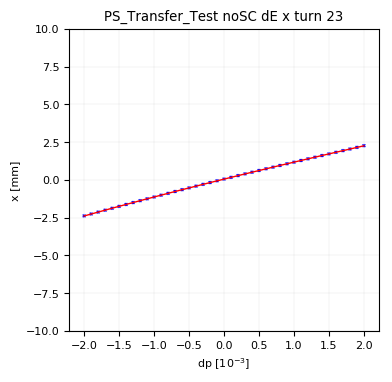

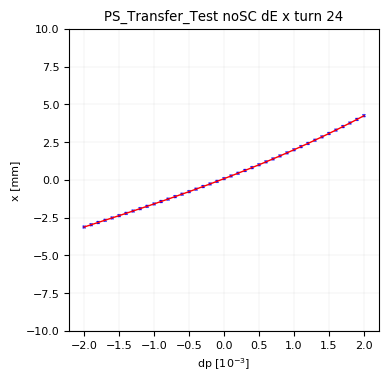

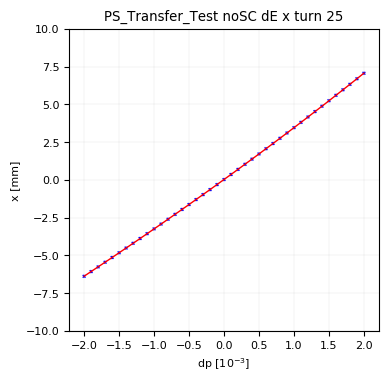

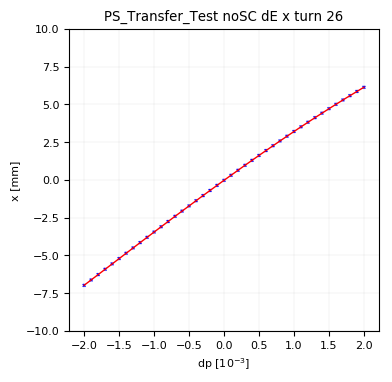

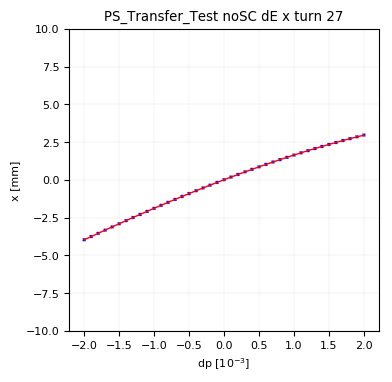

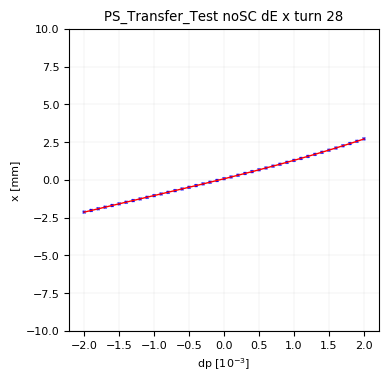

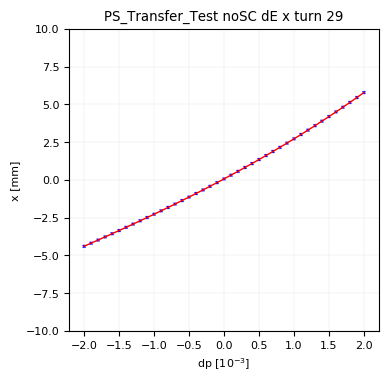

In [30]:
plt.rcParams['figure.figsize'] = [4.0, 4.0]
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100

plt.rcParams['font.size'] = 8
plt.rcParams['legend.fontsize'] = 'medium'
plt.rcParams['lines.linewidth'] = 1

parameter1 = 'dE'
parameter2 = 'x'
multi1 = 1E3
multi2 = 1E3

bet_x = 0.91

SEM_D_OP = []  
SEM_D2_OP = []  

((dd[key]['particles'][parameter1][0][0][0])/E/Beta**2)*multi1

for key, value in sorted(dd.iteritems()):
    
    fig1, ax1 = plt.subplots(1)
    tit = main_label + ' ' + sc + ' ' + parameter1 + ' ' + parameter2 + ' turn ' + str(key)    
    ax1.set_title(tit);
    ax1.set_xlabel(r'dp [$10^{-3}$]');
    ax1.set_ylabel('x [mm]');
    
    # Fit dispersion vector as cubic
    popt, pcov = curve_fit(cubic,((dd[key]['particles'][parameter1][0][0][0])/E/Beta**2), (dd[key]['particles'][parameter2][0][0][0]-closed_orbit_x)*multi2)
    #print popt[0], popt[1], popt[2], popt[3]
    SEM_D_OP.append(popt[1]*1E-3)
    SEM_D2_OP.append(popt[0]*1E-3)
    
    # Plot fit
    min_dp = np.min(((dd[key]['particles'][parameter1][0][0][0])/E/Beta**2))
    max_dp = np.max(((dd[key]['particles'][parameter1][0][0][0])/E/Beta**2))
    #print min_dp, max_dp   
    DELTAP_range = np.arange(min_dp, max_dp, 0.1e-4)        
    #print DELTAP_range
    ax1.plot(DELTAP_range*multi1, cubic(DELTAP_range,popt[0],popt[1],popt[2],popt[3]),'-r')

    # Plot particles
    s = np.ones(len(dd[key]['particles'][parameter1][0][0][0]))*4
    ax1.scatter(((dd[key]['particles'][parameter1][0][0][0])/E/Beta**2)*multi1, (dd[key]['particles'][parameter2][0][0][0]-closed_orbit_x)*multi2, color='b', marker='x', s=s);
    #c_it = c_it + 1

    #ax1.legend(fontsize='x-small', loc=4, title=legend_label)
    ax1.grid(linewidth=0.1)
    #ax1.set_xlim(-2E-3, 2E-3)
    ax1.set_ylim(-10, 10)

    #savename = 'Plots/x_xp/' + parameter1 + ' ' +  parameter2 + 'turn_' + str(int(key)) + '_V_bw.png'
    
    #bw_gifnames_x_xp.append(savename)
    
    #fig1.savefig(savename, dpi = 100)
    #plt.close()

In [31]:
# Remove turn -1
SEM_D_OP = SEM_D_OP[1:]
SEM_D2_OP = SEM_D2_OP[1:]

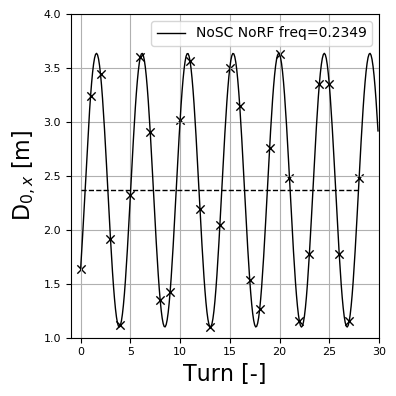

In [32]:
trns = 29
turns_fine = np.arange(0, trns, 0.1)
turns = np.arange(0, trns, 1)

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

turns_fine = np.arange(0, 30, 0.1)

y_Lat = (SEM_D_OP-np.mean(SEM_D_OP))
freq_Lat = pnf.naff(y_Lat, turns=29, nterms=1, skipTurns=0, getFullSpectrum=False, window=1)[0][1]
lab_Lat = 'NoSC NoRF freq=' + str(round_sig(freq_Lat))

popt_Lat, pcov_Lat = curve_fit(Md_fit, turns, SEM_D_OP, method = 'trf', bounds =((0,0,1.3,-np.inf),(5,5,1.4,np.inf)))
plt.scatter(turns, SEM_D_OP, marker = 'x', color = 'k')
plt.plot(turns_fine, Md_fit(turns_fine, popt_Lat[0], popt_Lat[1], popt_Lat[2], popt_Lat[3]),'k',label = lab_Lat)
plt.plot([turns[0], turns[-1]], [popt_Lat[0],popt_Lat[0]],'--k')

plt.xlabel('Turn [-]')
plt.ylabel(r'D$_{0,x}$ [m]')
#plt.title('PI.BSG52')
plt.xlim((-1, 30))
plt.ylim((1, 4))
plt.grid()
plt.legend(loc = 1, prop=dict(size=10))

ax1 = plt.gca()
#ax1.xaxis.set_major_locator(matplotlib.ticker.MaxNLocator(integer=True))

ax1.xaxis.label.set_fontsize(16)
ax1.yaxis.label.set_fontsize(16)

plt.tight_layout()

plt.savefig('Dx_NoSC_NoRF_Oscillation.png', dpi = 600)

0.36689533074650177
1.3713307756244235


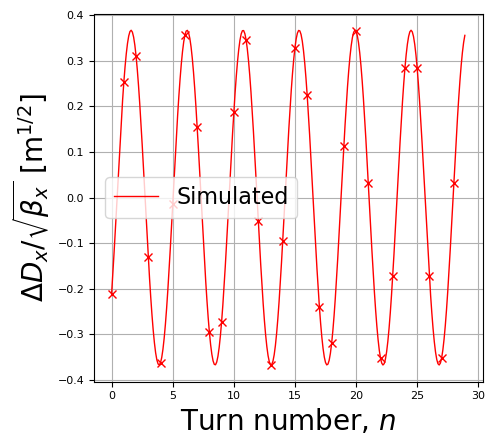

In [33]:
# Plot together the measured and simulated turn-by-turn Normalised dispersion:
trns = 29
turns_fine = np.arange(0, trns, 0.1)
turns = np.arange(0, trns, 1)

plt.figure(figsize=(5,4.5))

#popt_OP_H, pcov_OP_H = curve_fit(Md_fit,turnN,SEM_D_OP_H,method = 'trf',bounds =((0,0,1.3,-np.inf),(5,5,1.4,np.inf)))
#plt.errorbar(turnN,(SEM_D_OP_H-popt_OP_H[0])/np.sqrt(data_ptc_ref['BETX']['PI.BSG52']),yerr=SEM_D_err_OP_H/np.sqrt(data_ptc_ref['BETX']['PI.BSG52']), linestyle = 'None', marker = 'x',color = 'b', capsize = 3)
#plt.plot(turnN_fine,(Md_fit(turnN_fine,popt_OP_H[0],popt_OP_H[1],popt_OP_H[2],popt_OP_H[3])-popt_OP_H[0])/np.sqrt(data_ptc_ref['BETX']['PI.BSG52']),'b',label = 'OP')

#popt_OP_H_sim, pcov_OP_H_sim = curve_fit(Md_fit, turns, SEM_D_OP, method = 'trf', bounds =((0,0,1.3,-np.inf),(5,5,1.4,np.inf)))
popt_OP_H_sim, pcov_OP_H_sim = curve_fit(Md_fit, turns, SEM_D_OP, method = 'trf', bounds =((0,0,1,-np.inf),(5,5,2,np.inf)))
plt.plot(turns, ((SEM_D_OP)-popt_OP_H_sim[0])/np.sqrt(11.95),'xr')
plt.plot(turns_fine,(Md_fit(turns_fine,popt_OP_H_sim[0],popt_OP_H_sim[1],popt_OP_H_sim[2],popt_OP_H_sim[3])-popt_OP_H_sim[0])/np.sqrt(11.95),'r',label = 'Simulated')


plt.xlabel('Turn number, $n$')
plt.ylabel(r'$\Delta D_{x}/\sqrt{\beta_{x}}$ [m$^{1/2}$]')
#plt.title('PI.BSG52')
#plt.xlim((0,20))
#plt.ylim((-0.5,0.5))
plt.grid()
plt.legend(loc = 'lower right')
ax = plt.gca()
#ax.xaxis.set_major_locator(matplotlib.ticker.MaxNLocator(integer=True))

ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)
ax.legend(prop=dict(size=16))

plt.tight_layout()

#plt.savefig('./plots/OP/BSGH_DX.png')

print popt_OP_H_sim[1]/np.sqrt(11.95)
print popt_OP_H_sim[2]

10.000000000000002 8.000000000000002 1.3123380177625354 1.7586322248341177


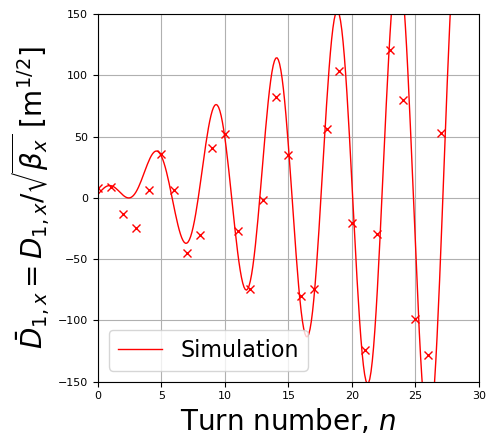

In [49]:
# Plot the turn-by-turn non-linear dispersion
trns = 29
turns_fine = np.arange(0, trns, 0.1)
turns = np.arange(0, trns, 1)

plt.figure(figsize=(5,4.5))

plt.plot(turns, SEM_D2_OP,'xr')
#popt_OP_H_sim_D2, pcov_OP_H_sim_D2 = curve_fit(Md_ramp_fit,turns,SEM_D2_OP/np.sqrt(11.95),method = 'trf',bounds =((-10, 150./31,1.35,-np.inf),(10, 150./10,1.42,np.inf)))
popt_OP_H_sim_D2, pcov_OP_H_sim_D2 = curve_fit(Md_ramp_fit,turns,SEM_D2_OP/np.sqrt(11.95),method = 'trf',bounds =((10, 8, 1.2,-np.inf),(30, 150./10,1.42,np.inf)))
plt.plot(turns_fine,Md_ramp_fit(turns_fine,popt_OP_H_sim_D2[0],popt_OP_H_sim_D2[1],popt_OP_H_sim_D2[2],popt_OP_H_sim_D2[3]),'-r',label = 'Simulation')


plt.grid()
plt.xlabel('Turn number, $n$')
plt.ylabel(r'$\bar{D}_{1,x} = D_{1,x}/\sqrt{\beta_{x}}$ [m$^{1/2}$]')
plt.xlim((0, trns+1))
plt.ylim((-150,150))
plt.legend(loc = 'lower left')
ax = plt.gca()
#ax.xaxis.set_major_locator(matplotlib.ticker.MaxNLocator(integer=True))

ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)
ax.legend(prop=dict(size=16))

plt.tight_layout()

#plt.savefig('./plots/OP/BSGH_D2X.png')

print popt_OP_H_sim_D2[0], popt_OP_H_sim_D2[1], popt_OP_H_sim_D2[2], popt_OP_H_sim_D2[3]